In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
import re
import numpy as np

# Stacked bar plot

In [50]:
# Function to clean peptide column
def clean_peptides(df):
    df['modi_peptide'] = df['peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
    df['modi_peptide'] = df['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex=True)
    df['pep_length'] = df['modi_peptide'].str.len()
    return df

In [56]:
# Main directory containing patient data
main_directory = '/cmnfs/data/proteomics/metaproteomics/PXD011515_sara_analysis/sample_specific'

# List of patient numbers
patient_numbers = patient_ids = [
    4, 9, 11, 26, 42, 49, 70, 72, 77, 83, 92, 93, 103, 112, 120, 124, 130, 135, 146, 152,
    153, 154, 155, 161, 173, 191, 194, 199, 210, 222, 228, 229, 231, 242, 245, 251, 253,
    254, 256, 263, 265, 266, 268, 269, 276, 284, 286, 295, 299, 303, 310, 313, 315, 318,
    321, 328, 334, 345, 347, 351, 352, 353, 360, 364, 368, 373, 378, 379, 380, 381, 383,
    400, 401, 402, 416, 418, 421, 422, 431, 438, 442, 446, 456, 459, 460, 464, 465, 466,
    469, 470, 475, 479, 480, 481, 485, 491, 492, 494, 497, 500, 501, 503, 506, 507, 508,
    510, 514, 515, 516, 518, 520, 521, 522, 524, 527, 529, 530, 532, 537, 538, 539, 540,
    542, 546, 548, 550, 558, 564, 565, 566, 571, 576, 578, 582, 587, 588, 596, 601, 604,
    607, 631, 637, 642, 643, 648, 651, 656, 662, 666, 672, 680, 684, 694, 696, 709, 712,
    718, 723, 726, 730, 731, 738, 741, 742, 743, 754, 757, 763, 764, 766, 769, 770, 771,
    774, 780, 781, 784, 785, 788, 791, 802, 804, 805, 810, 813, 818, 824, 827, 833, 839,
    840, 844, 848, 849, 858, 859, 860, 861, 866, 868, 870, 874, 876, 877, 887, 888, 891,
    895, 913, 915, 923, 931
]

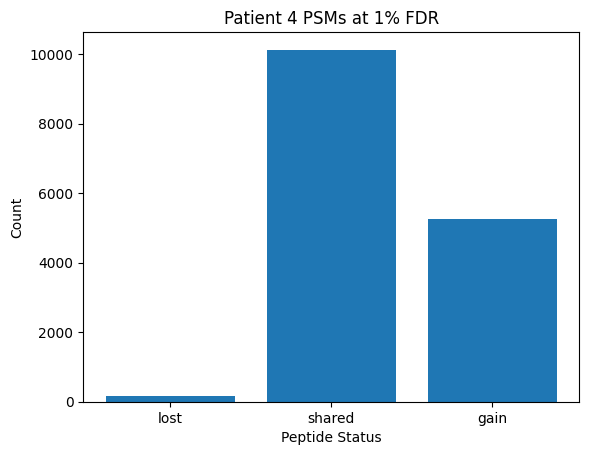

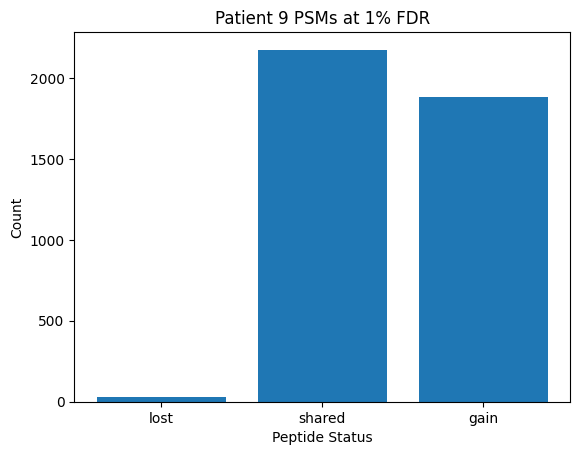

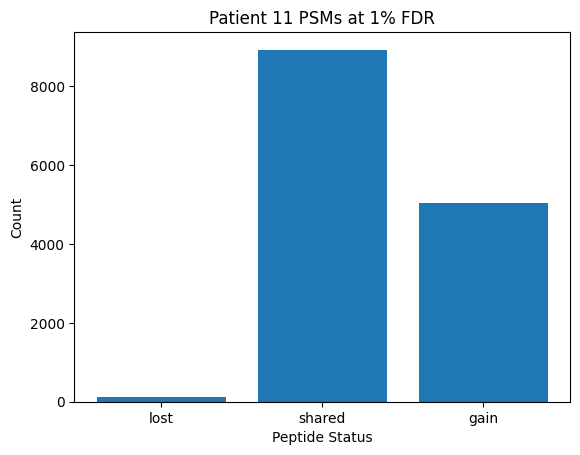

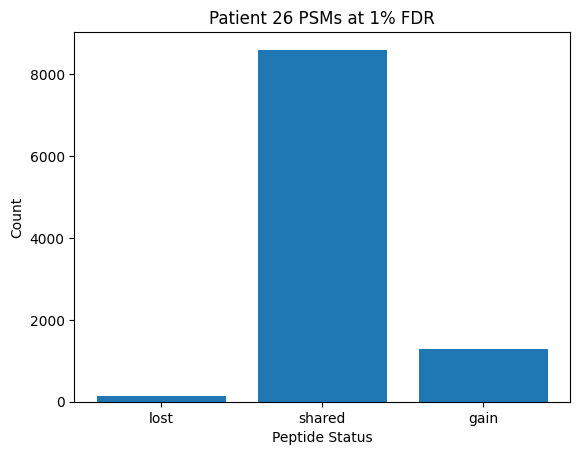

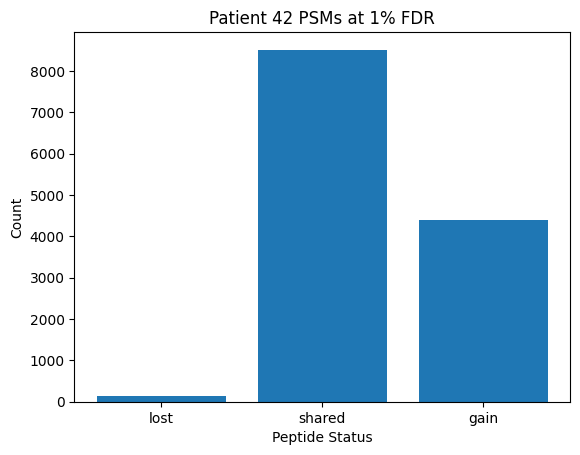

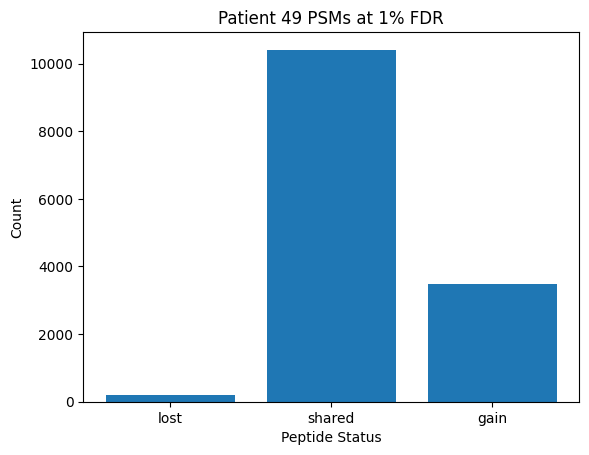

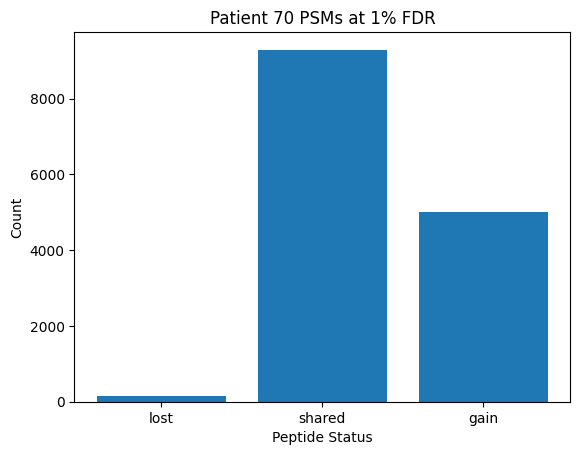

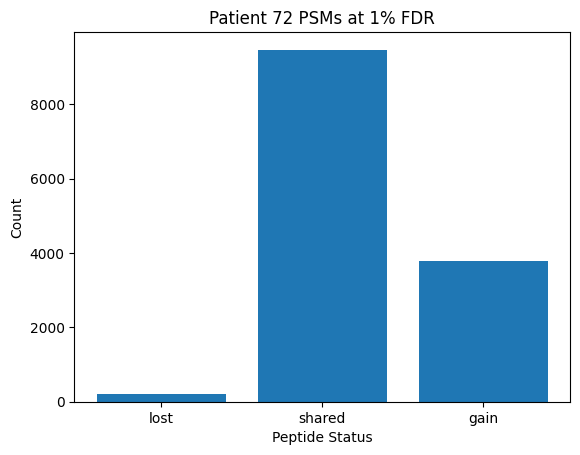

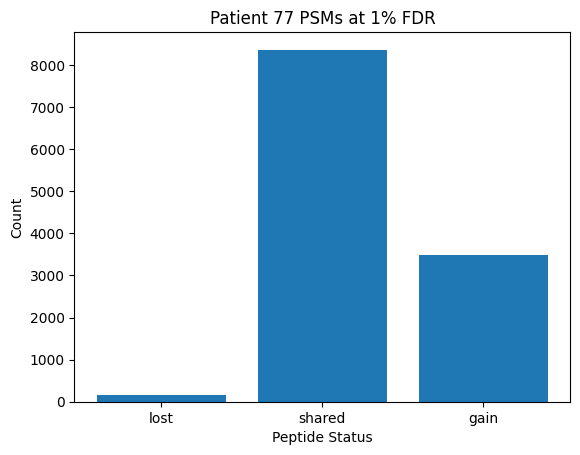

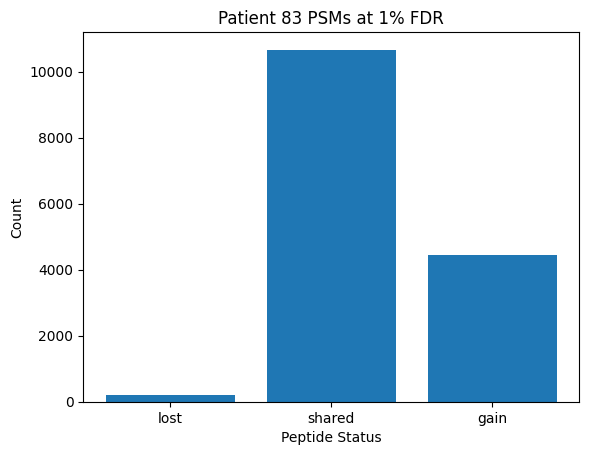

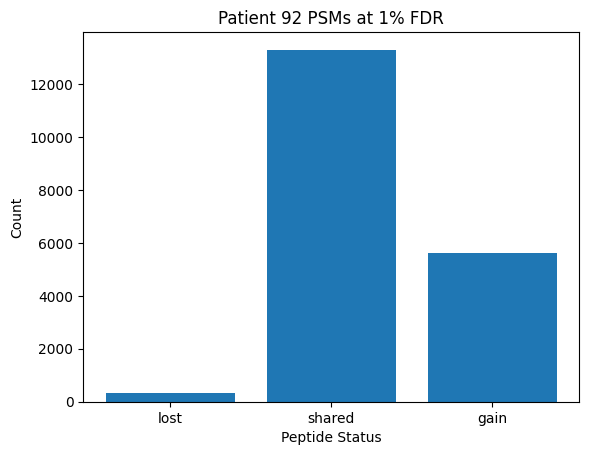

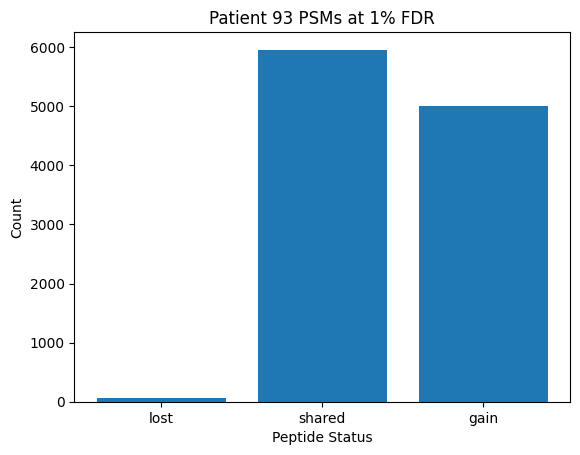

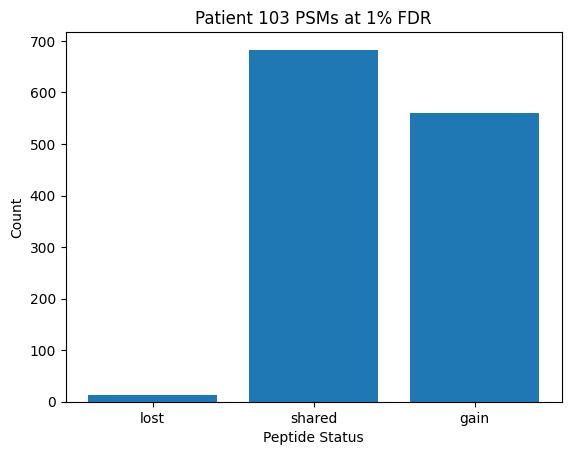

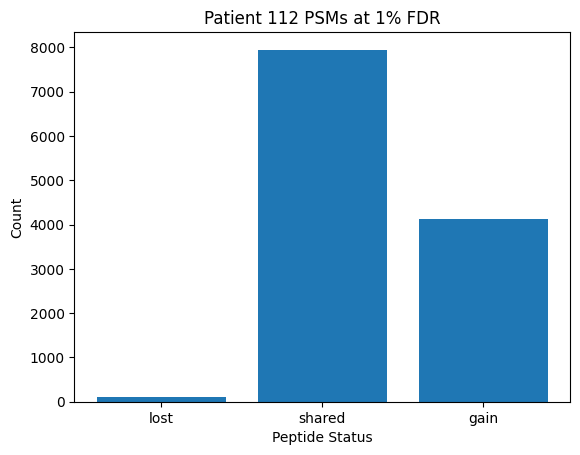

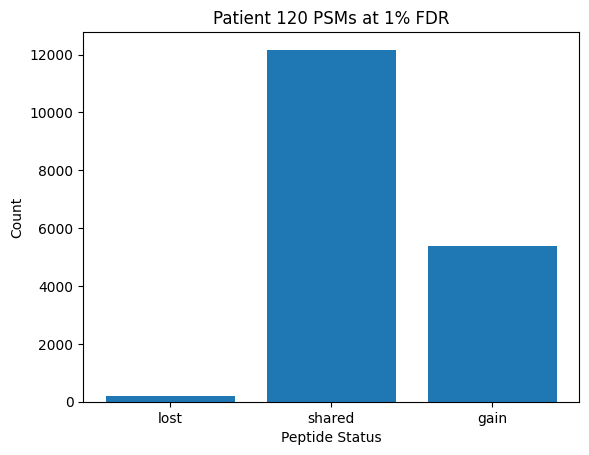

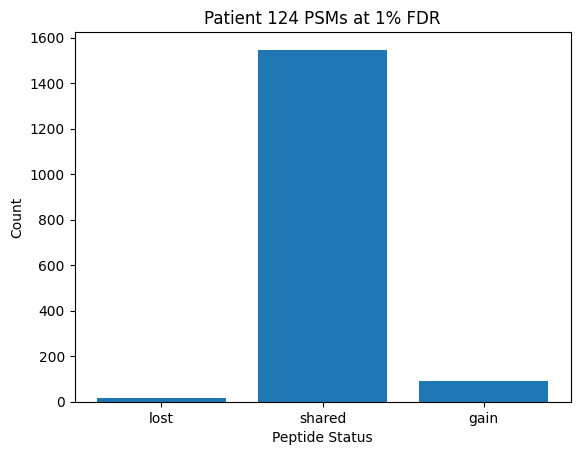

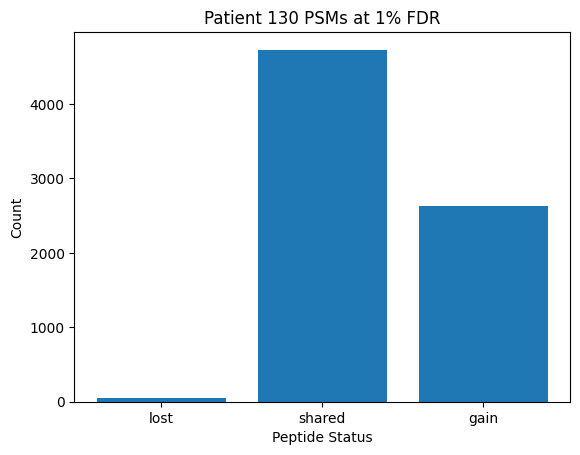

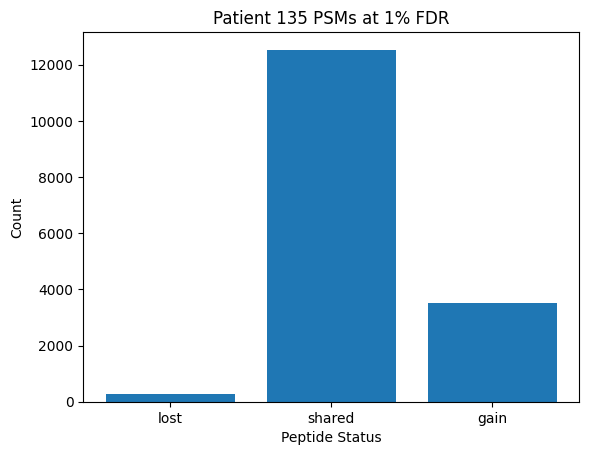

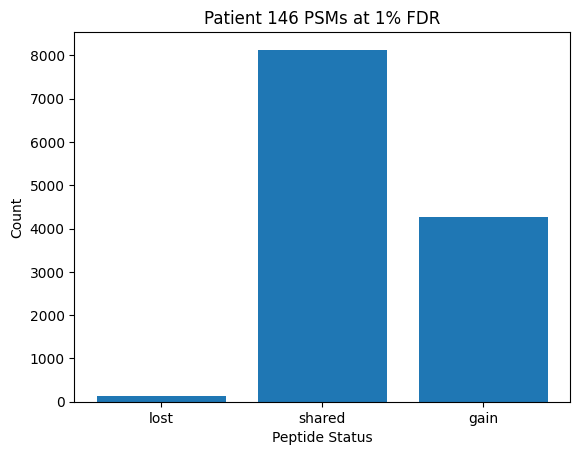

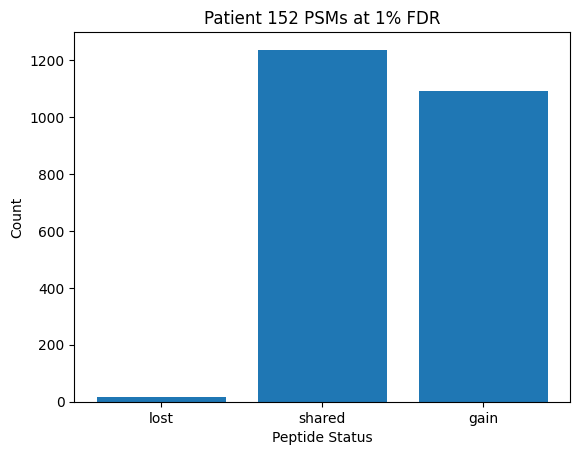

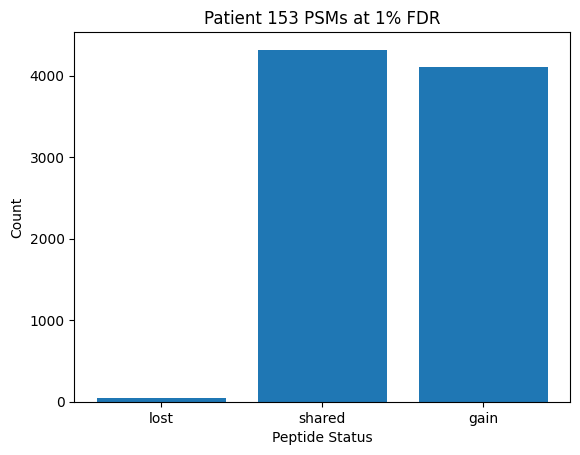

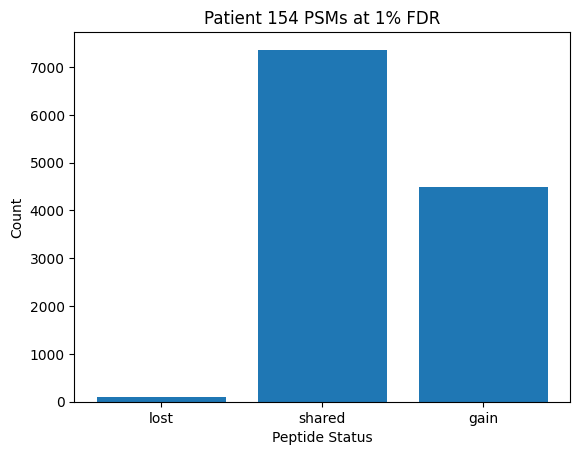

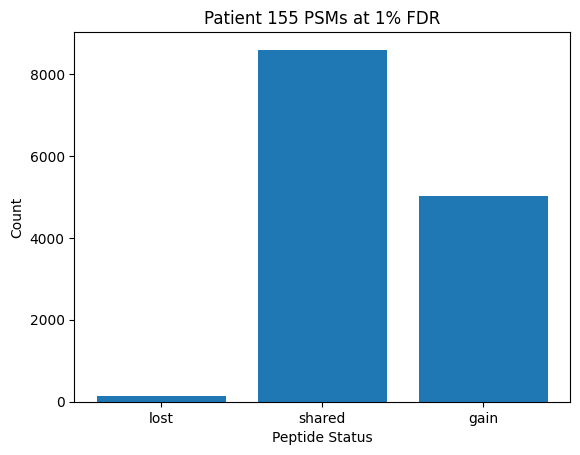

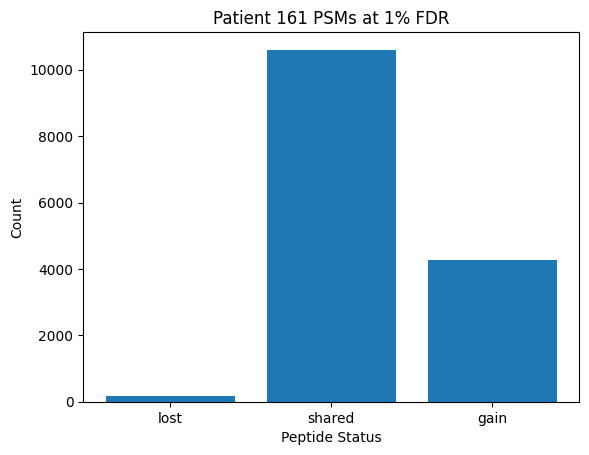

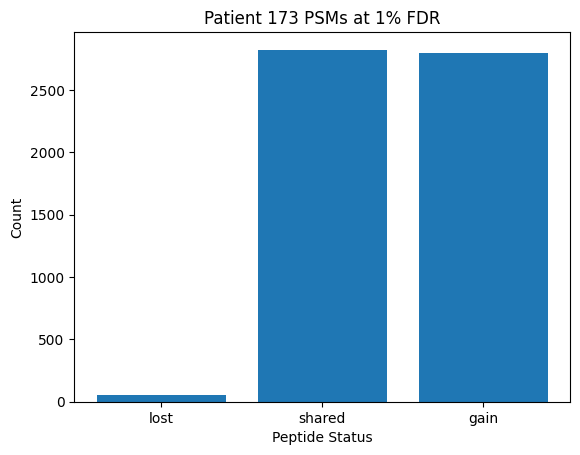

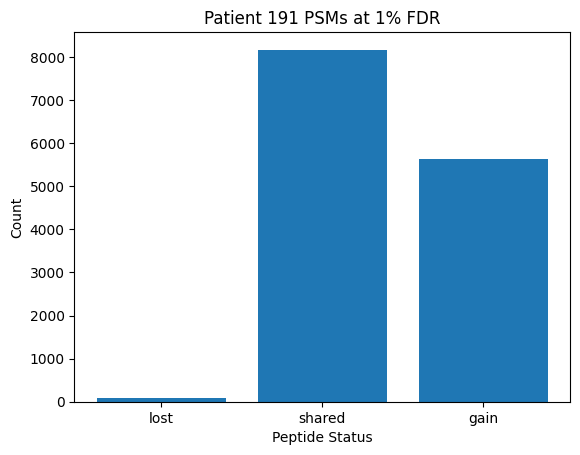

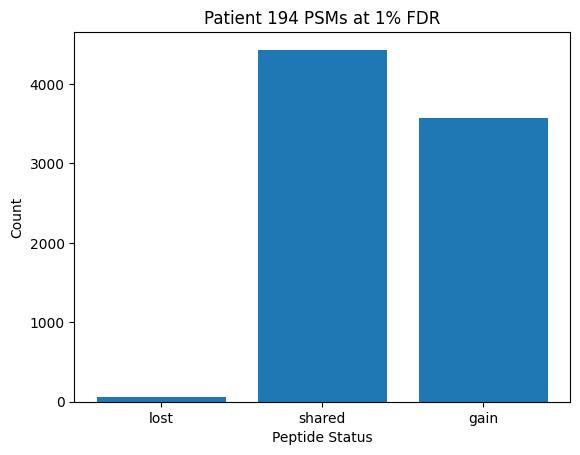

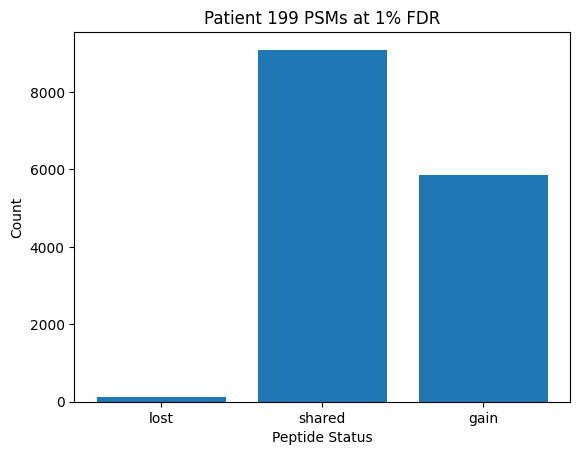

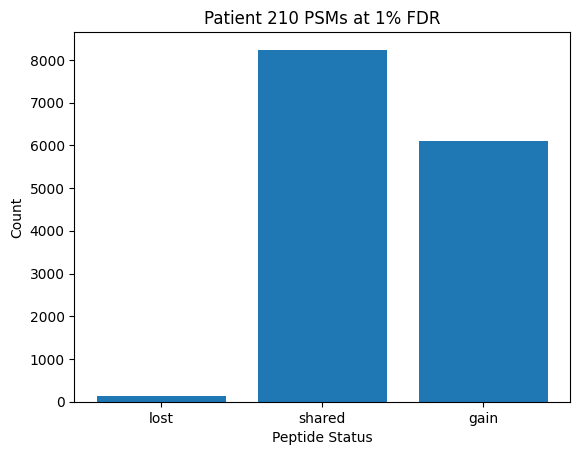

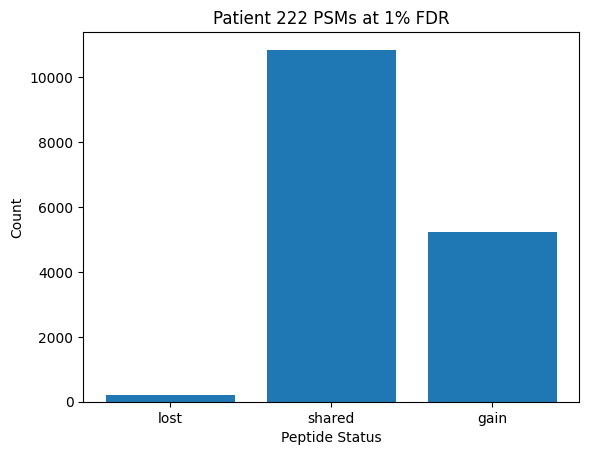

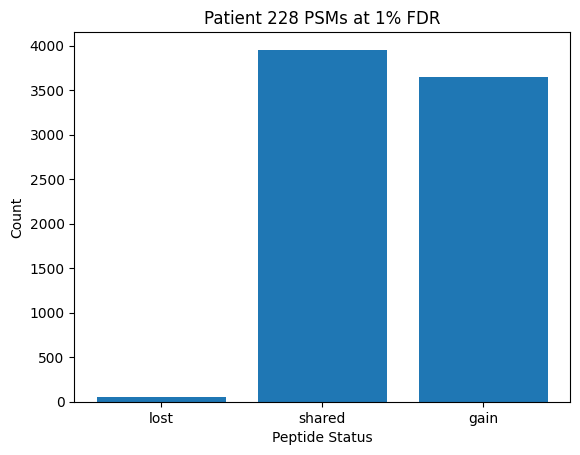

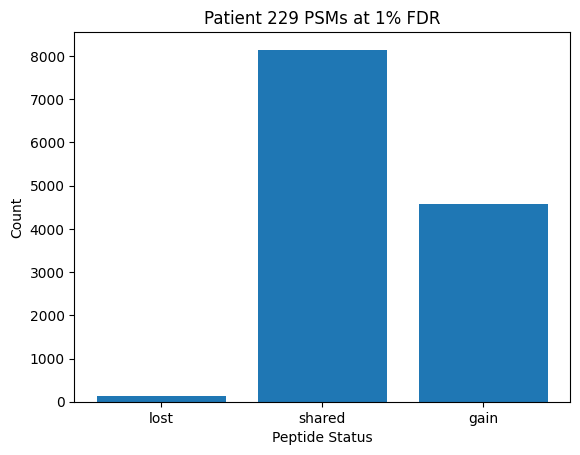

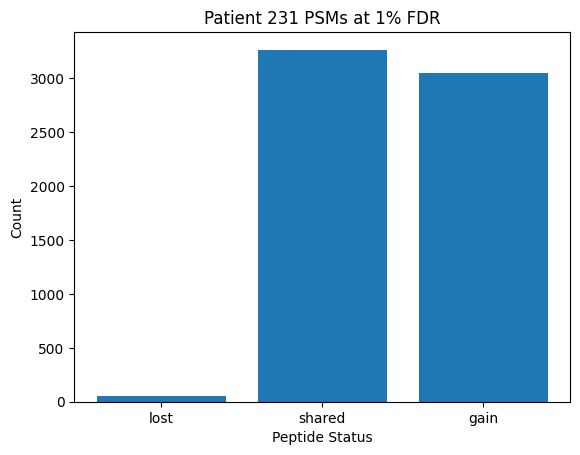

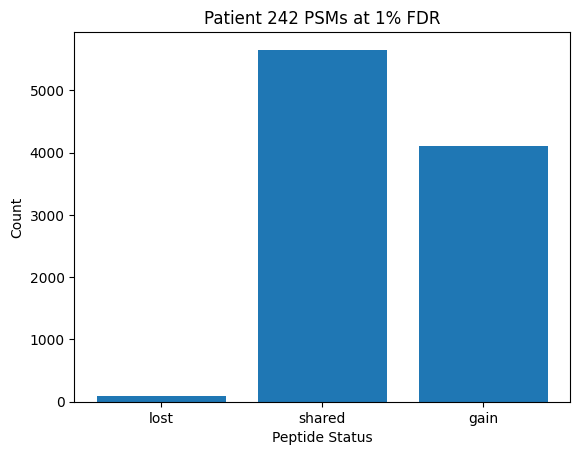

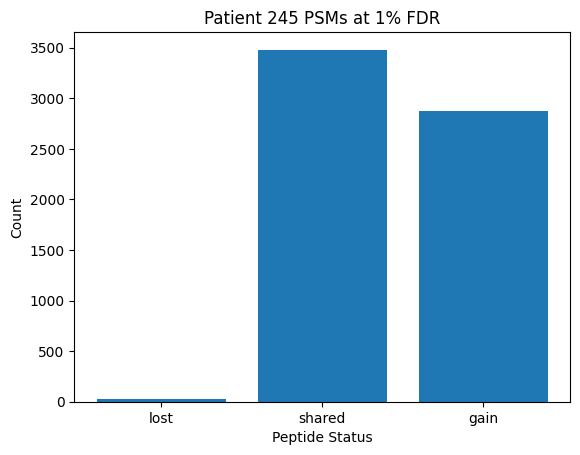

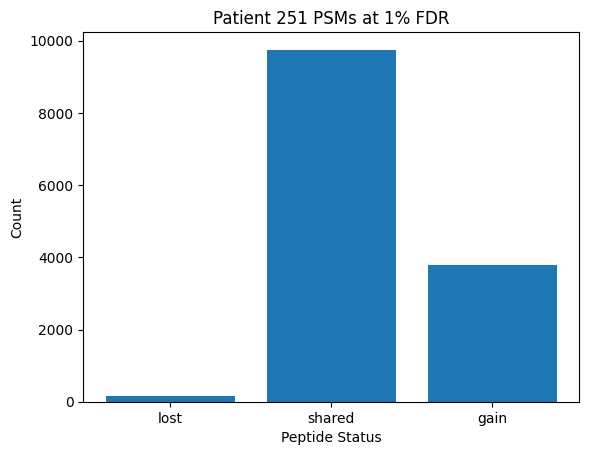

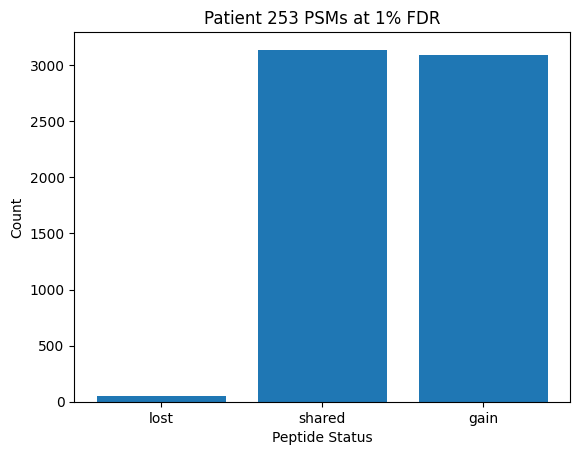

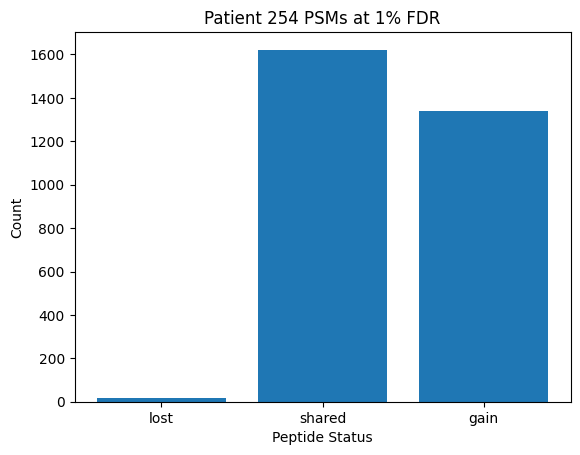

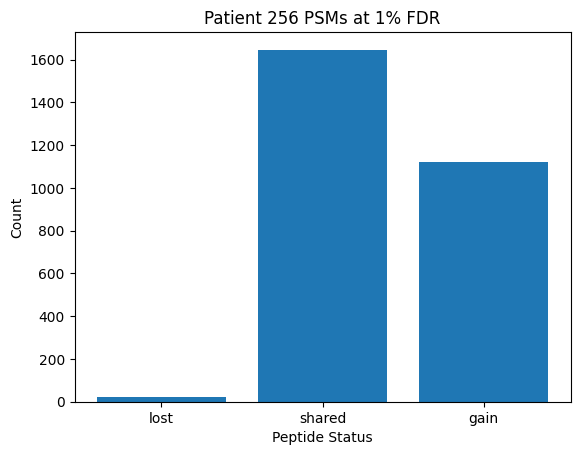

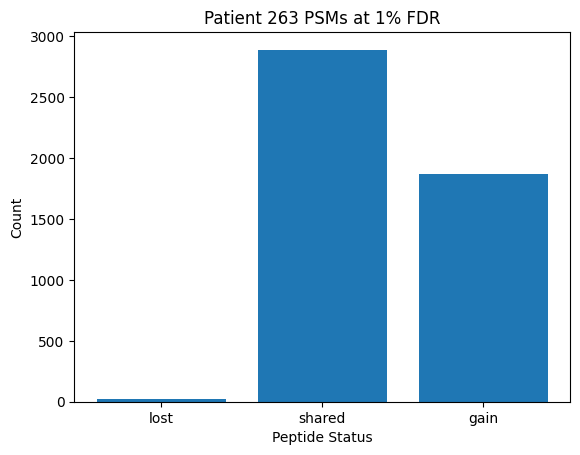

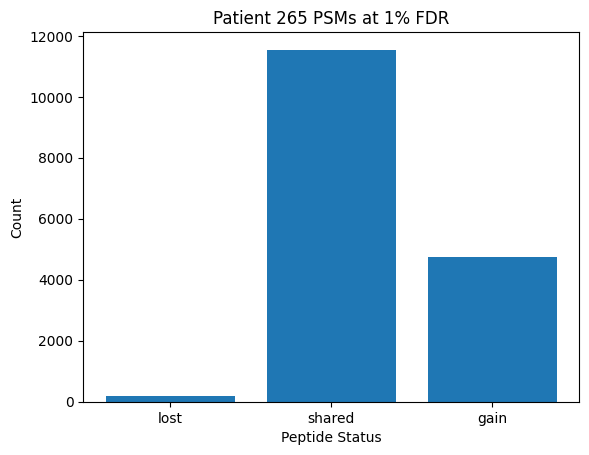

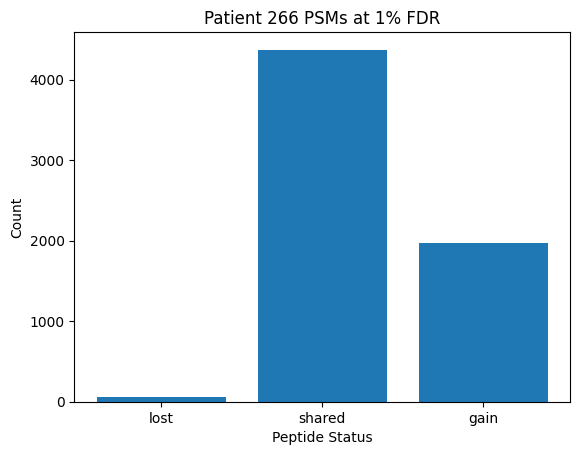

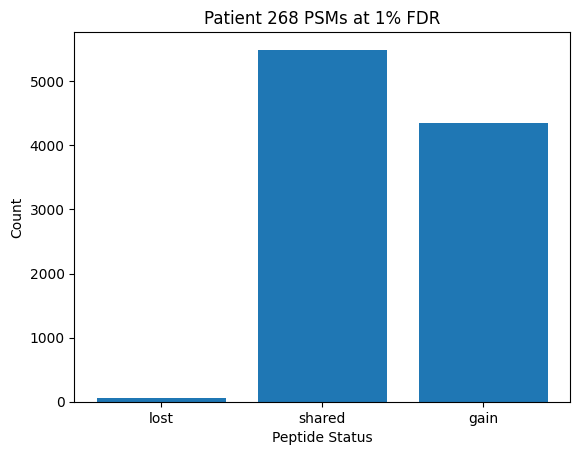

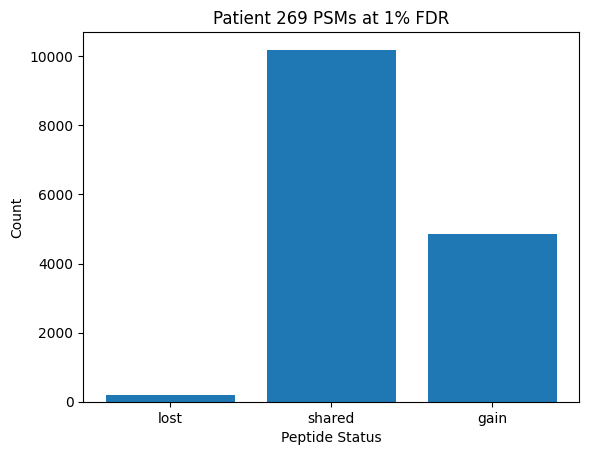

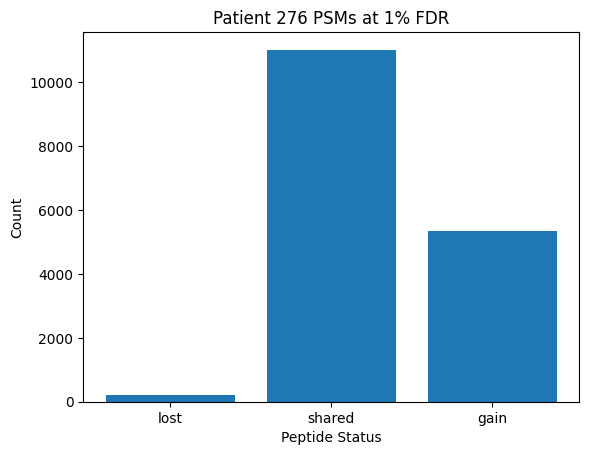

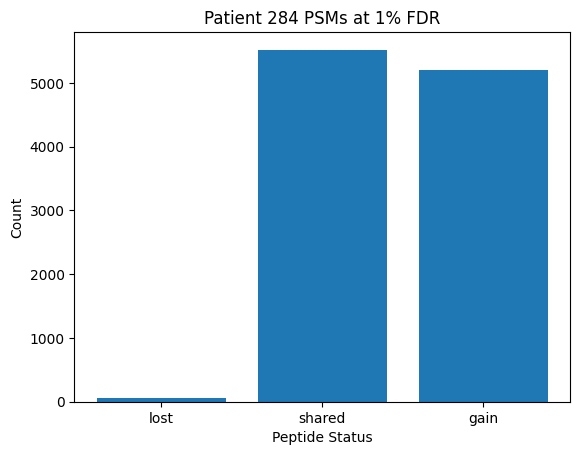

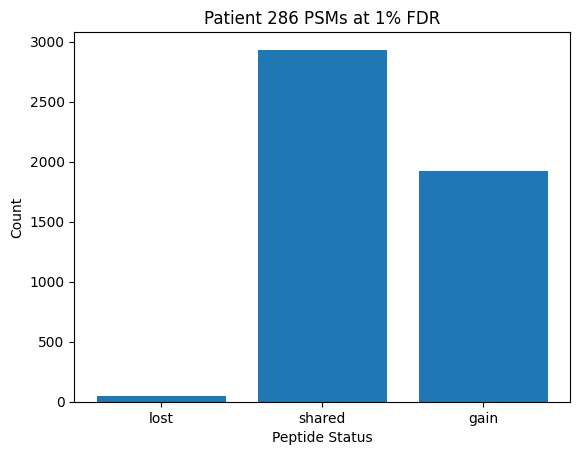

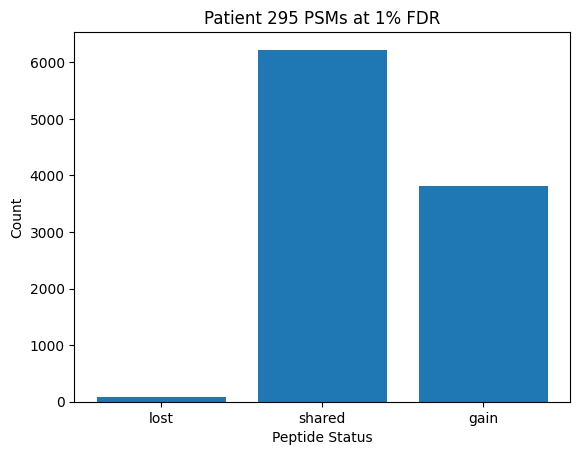

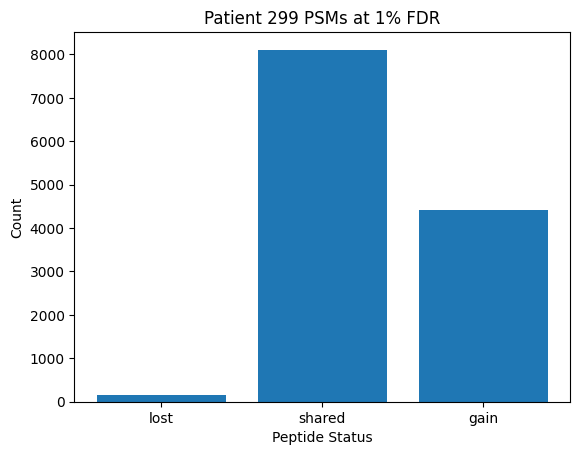

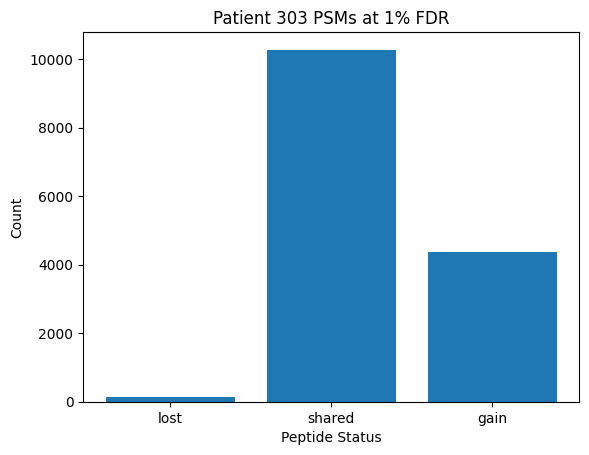

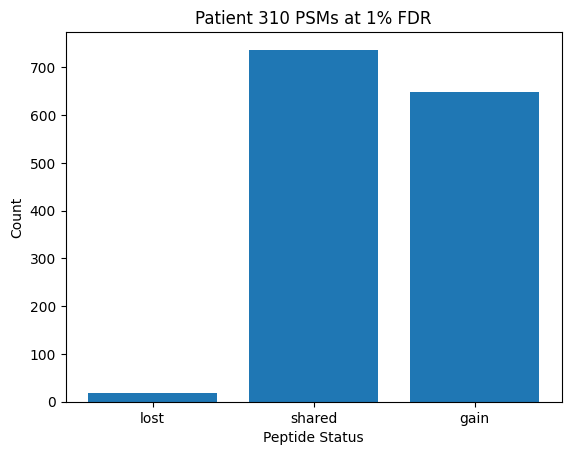

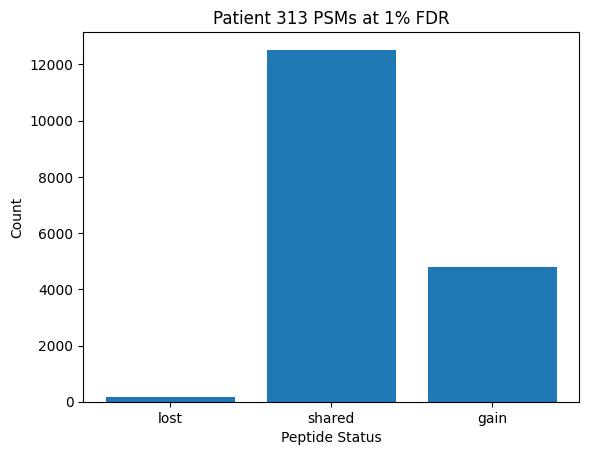

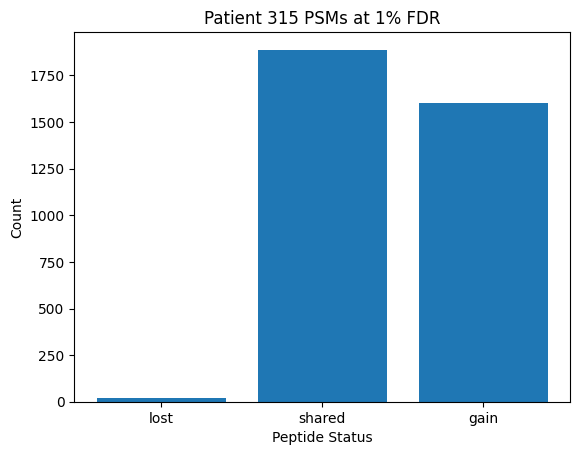

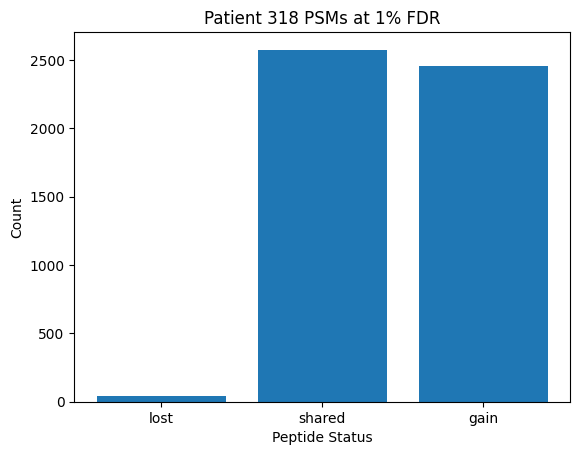

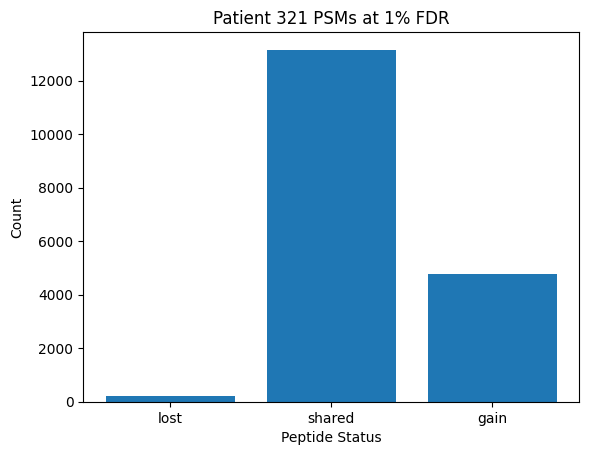

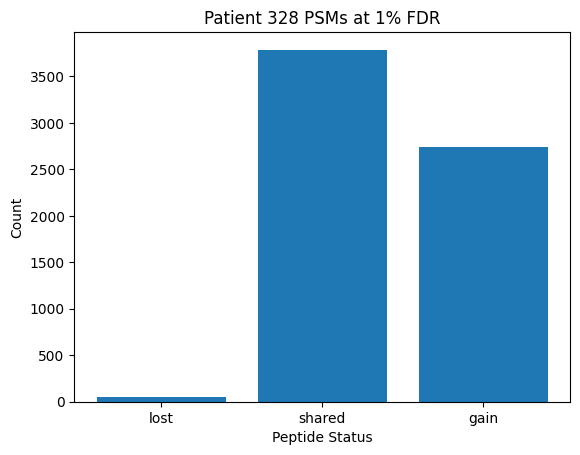

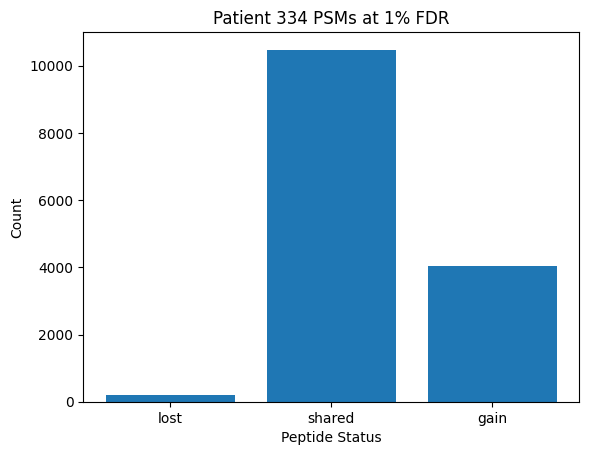

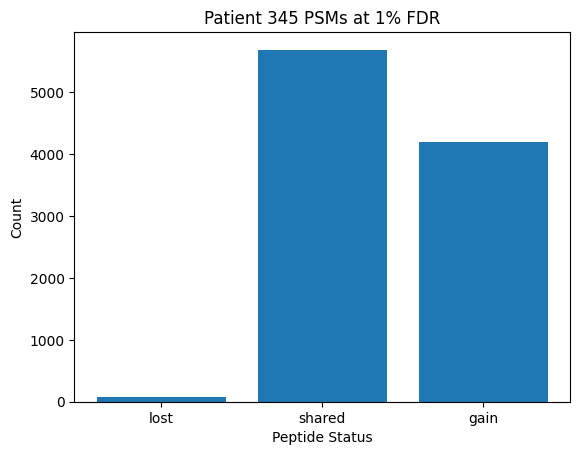

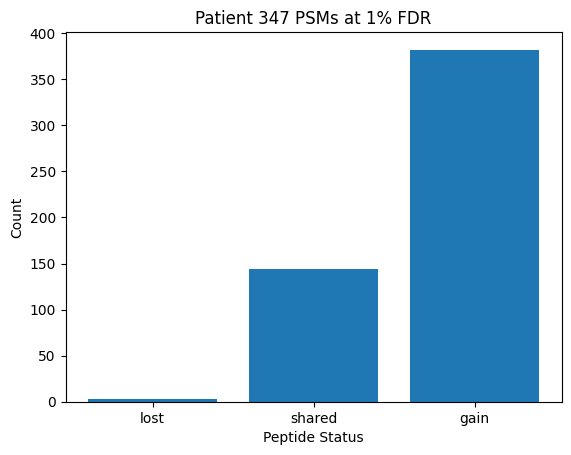

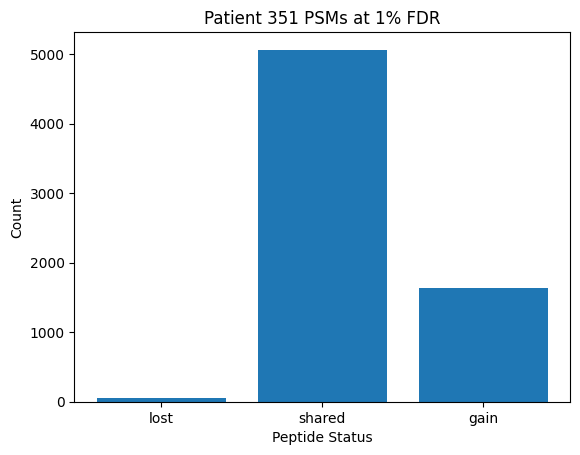

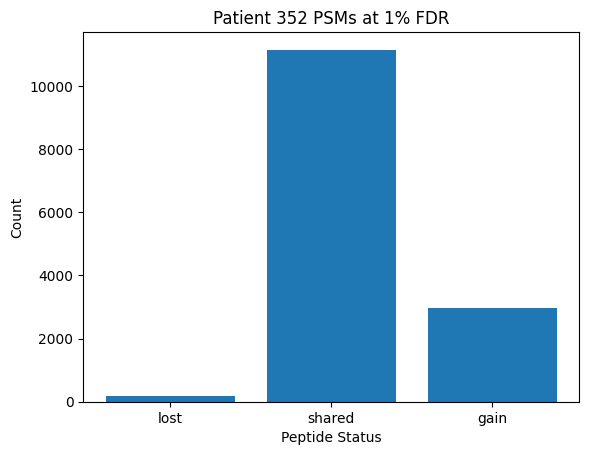

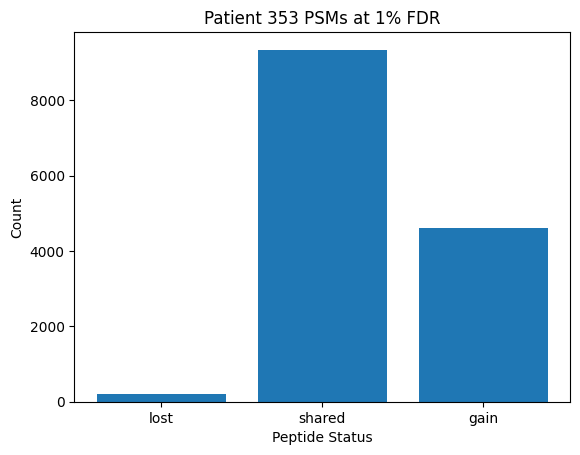

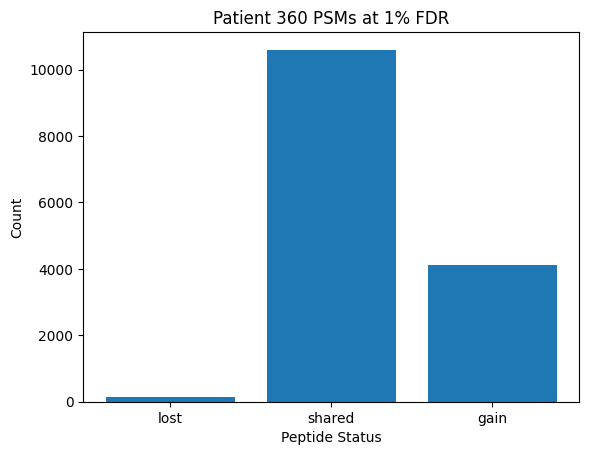

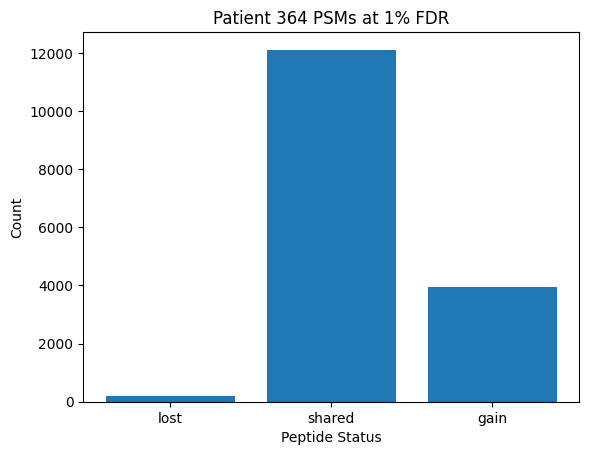

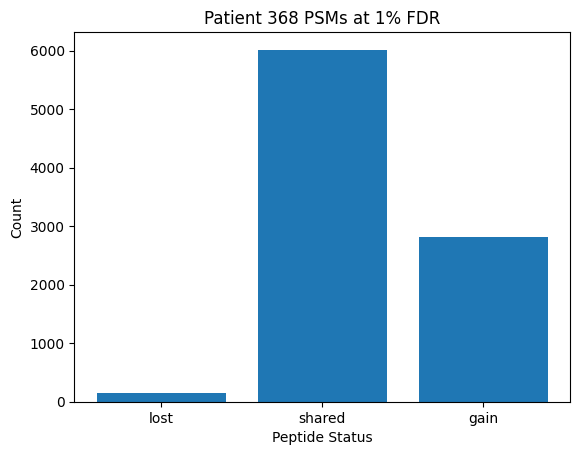

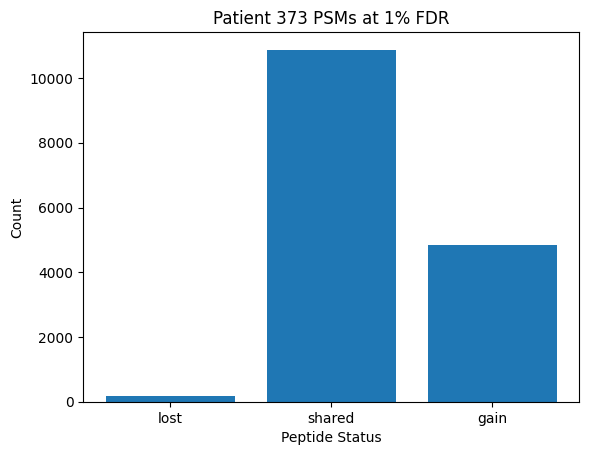

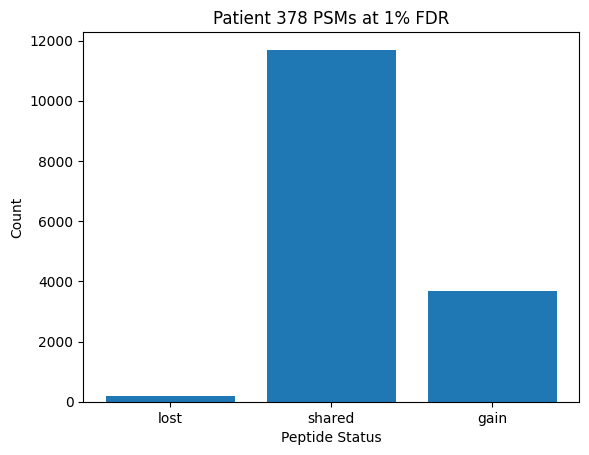

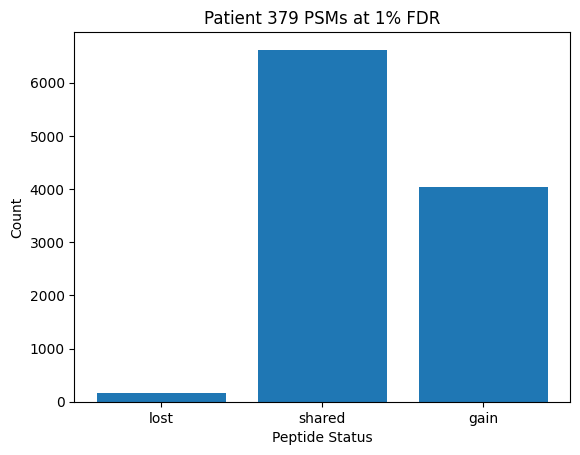

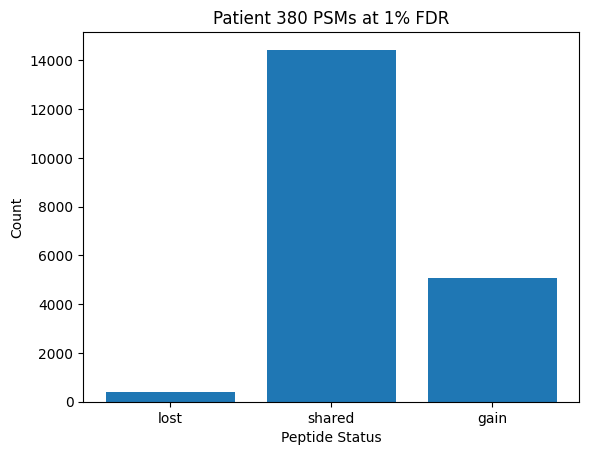

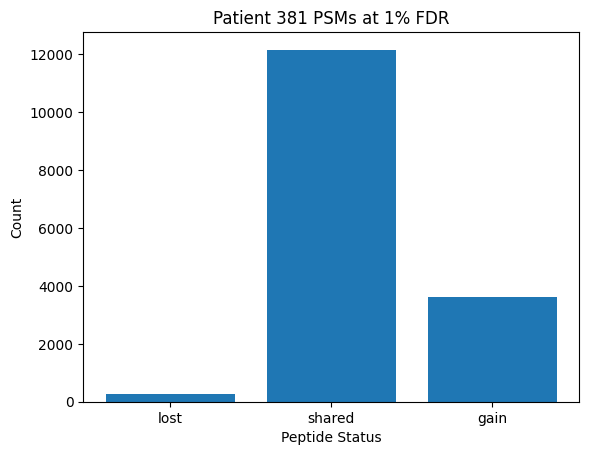

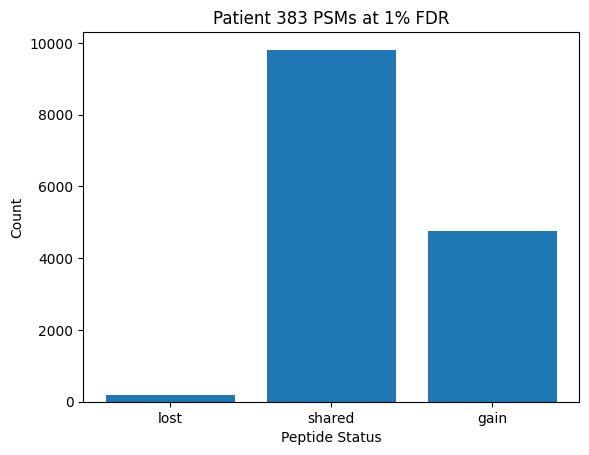

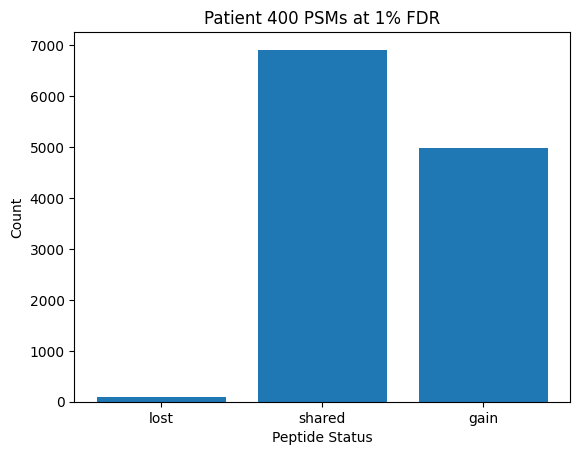

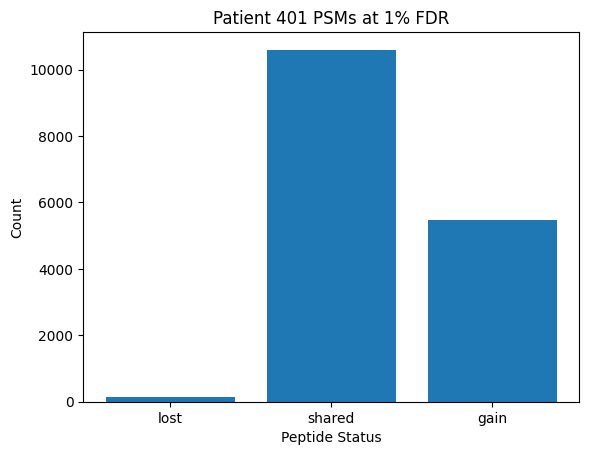

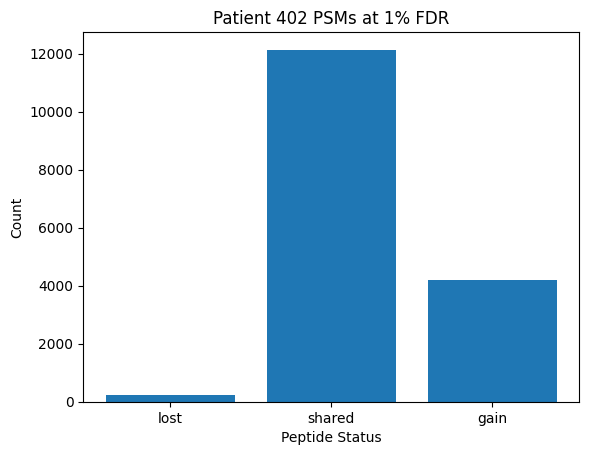

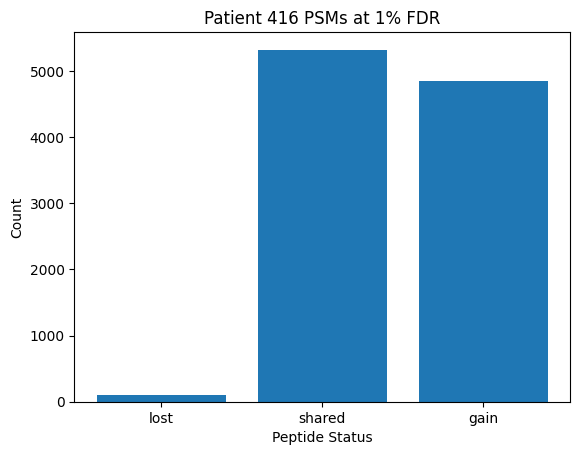

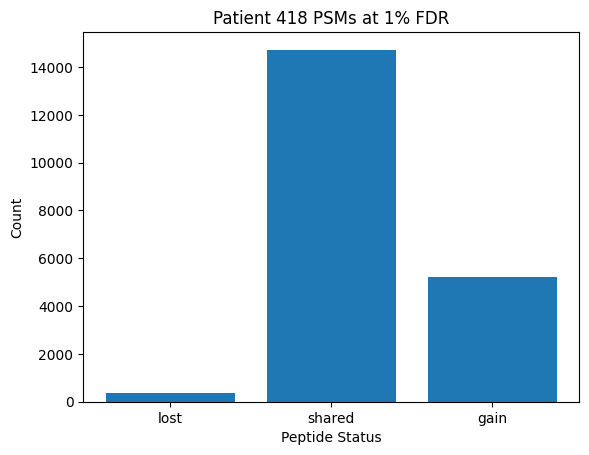

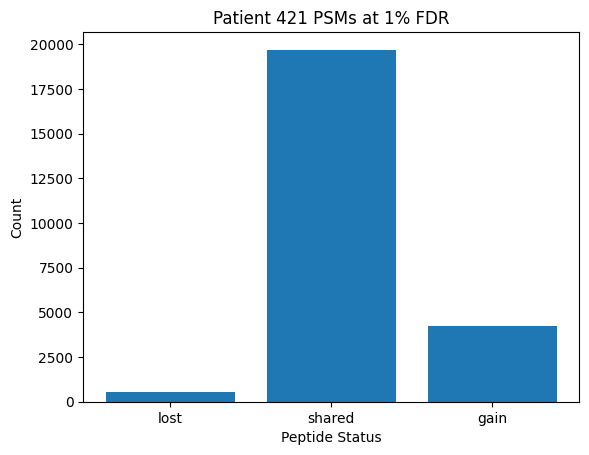

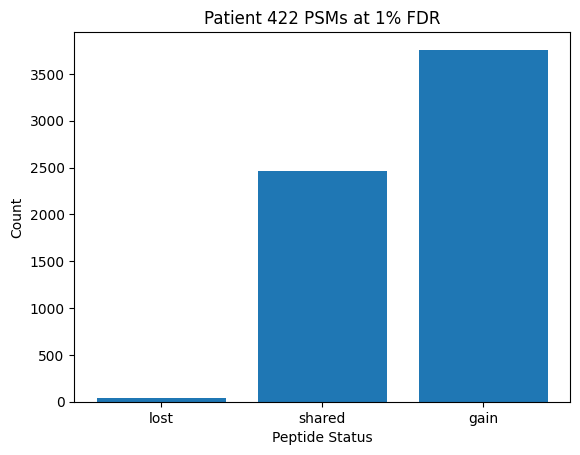

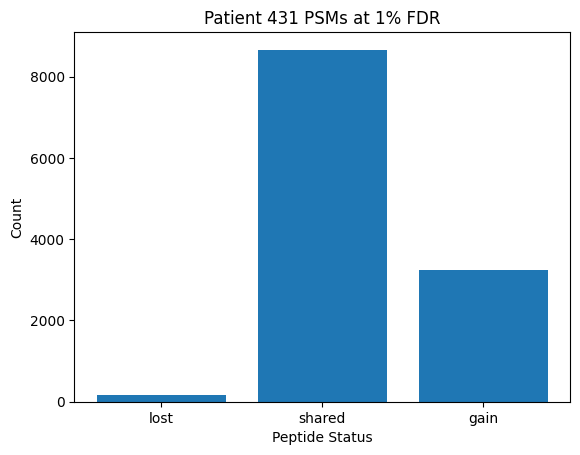

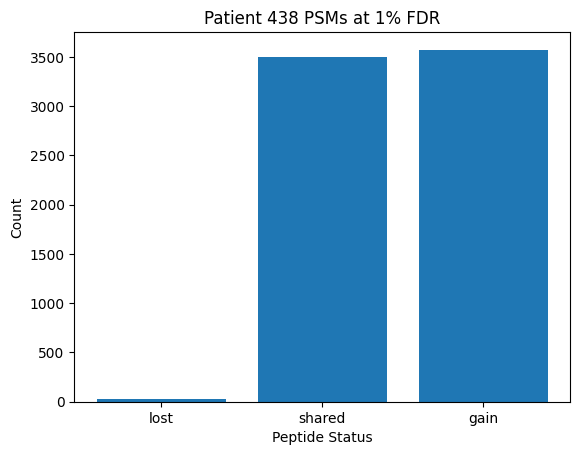

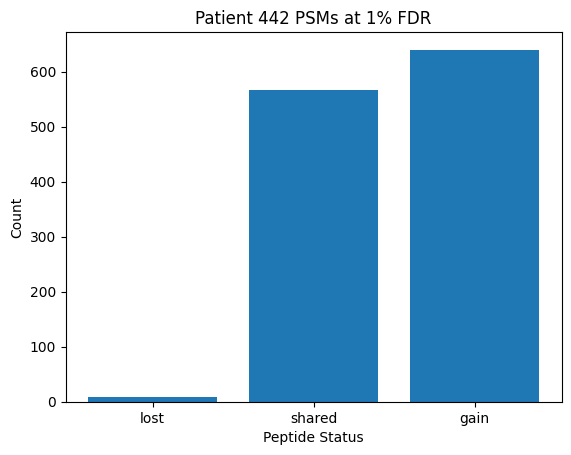

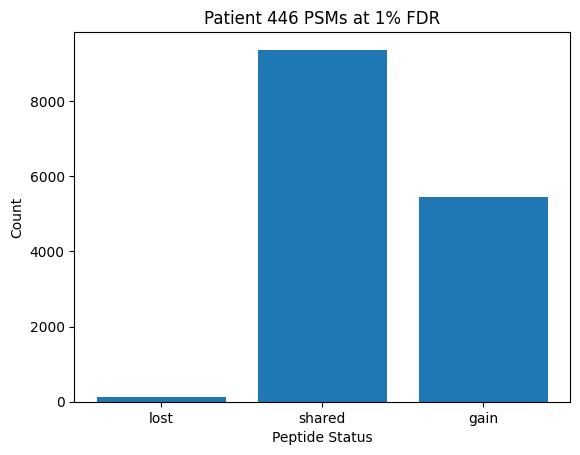

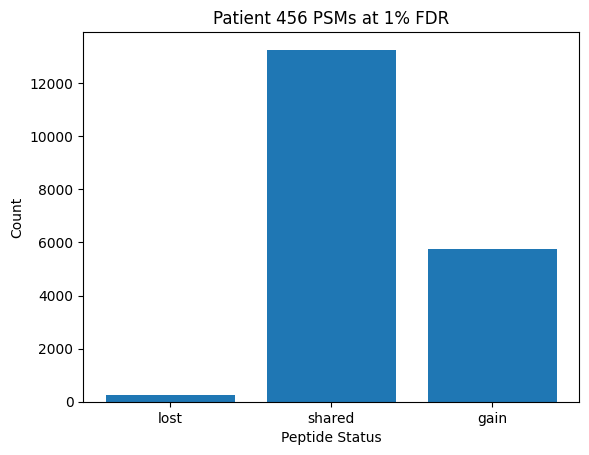

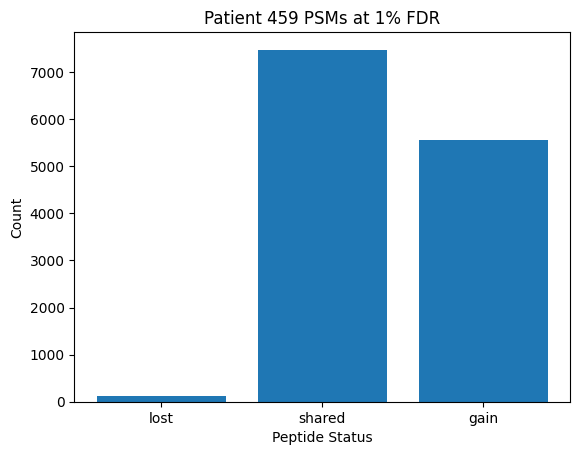

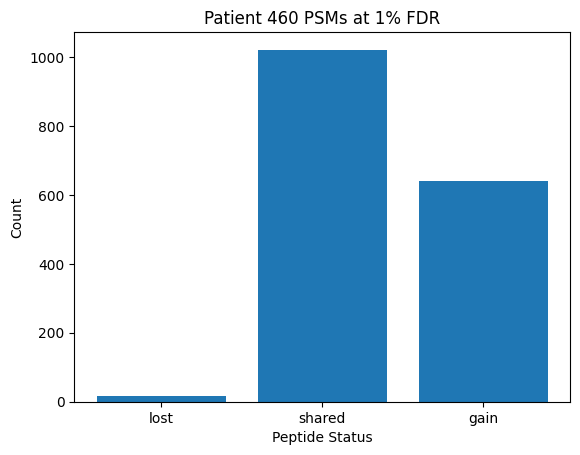

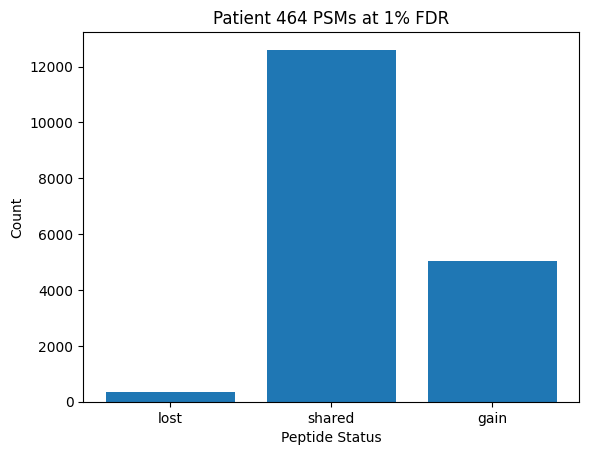

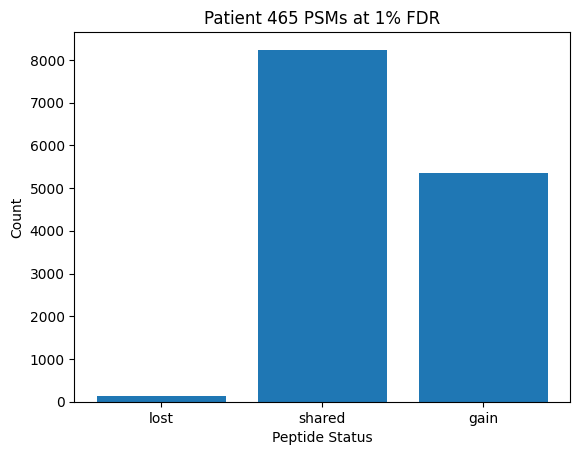

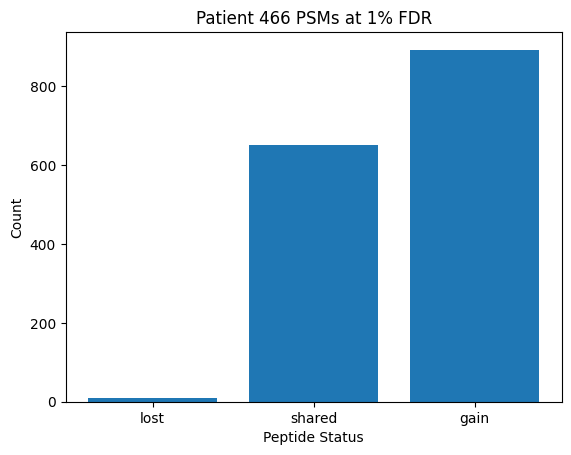

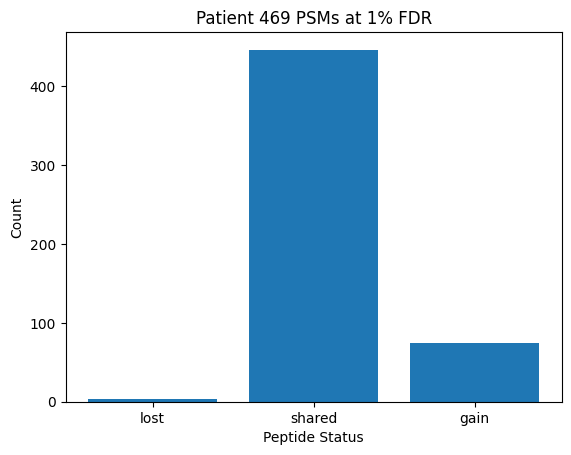

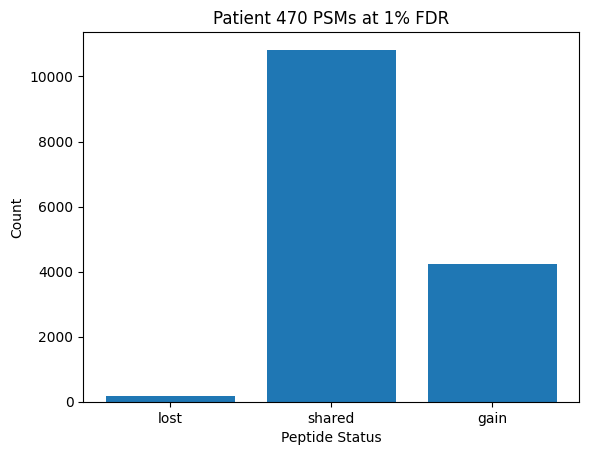

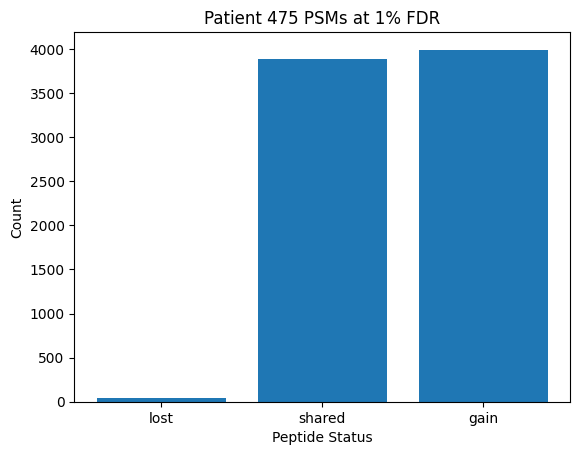

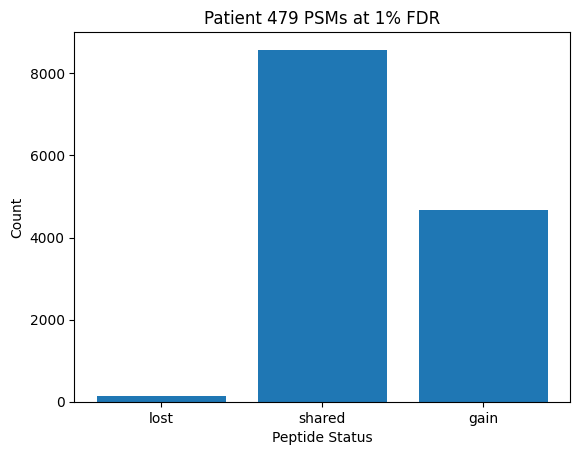

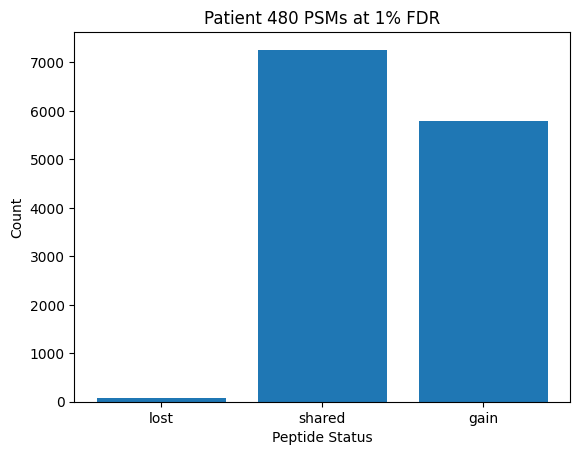

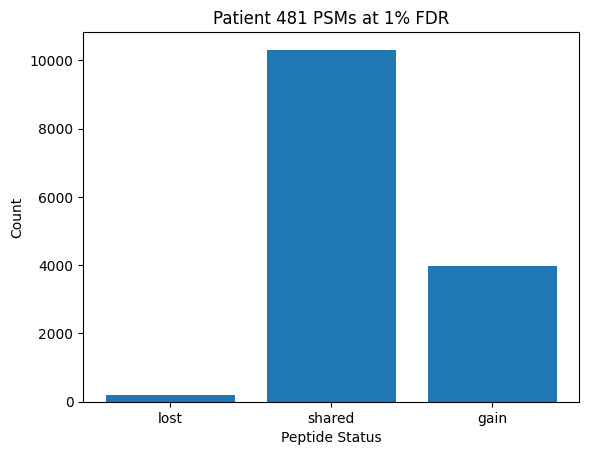

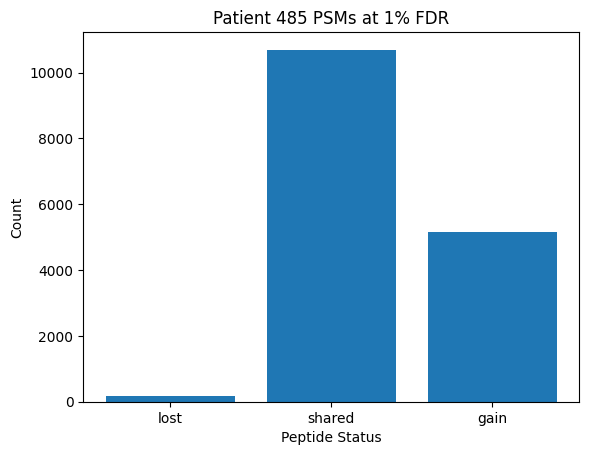

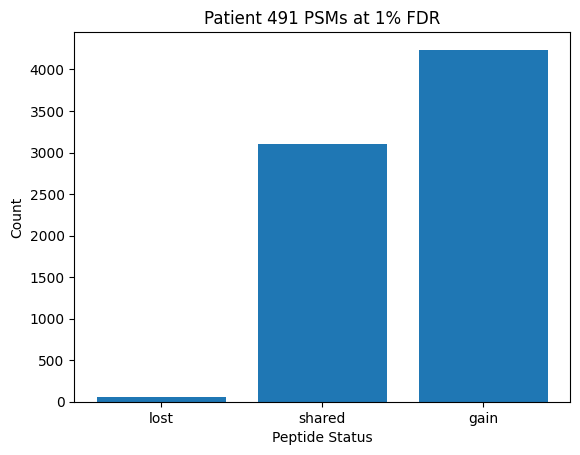

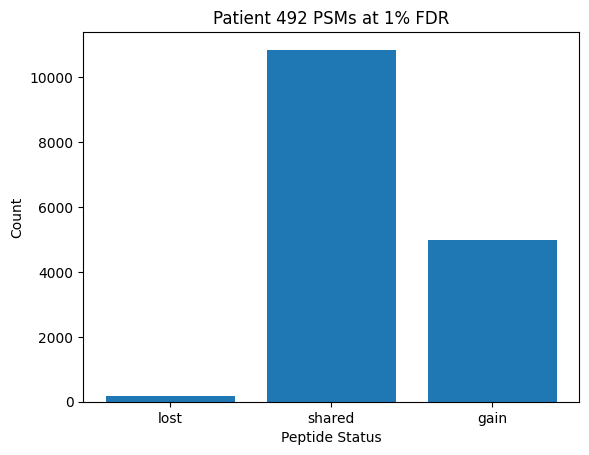

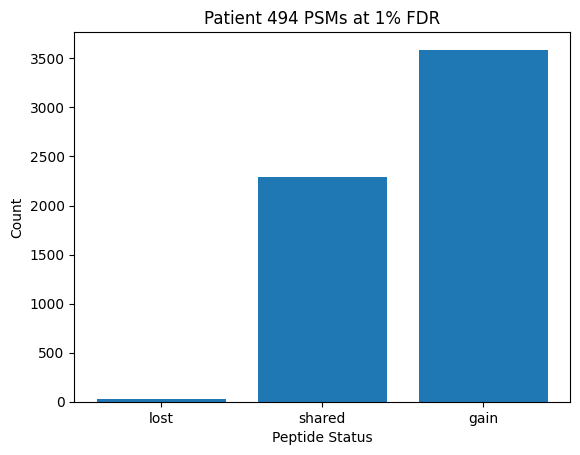

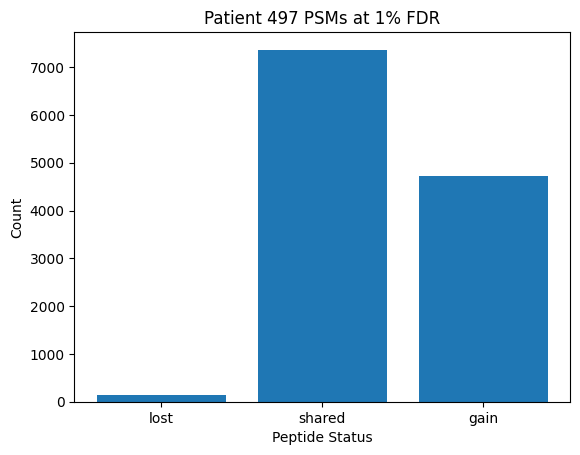

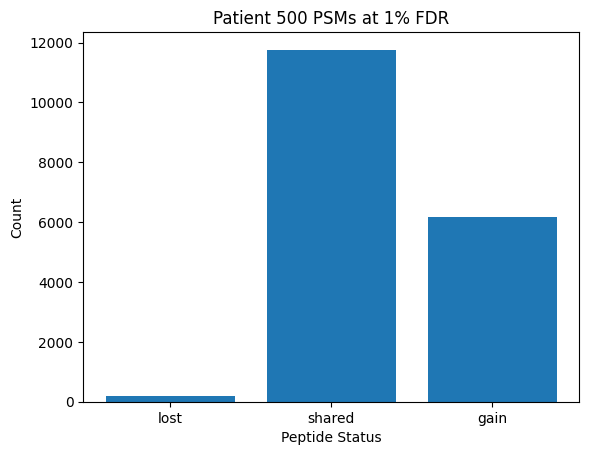

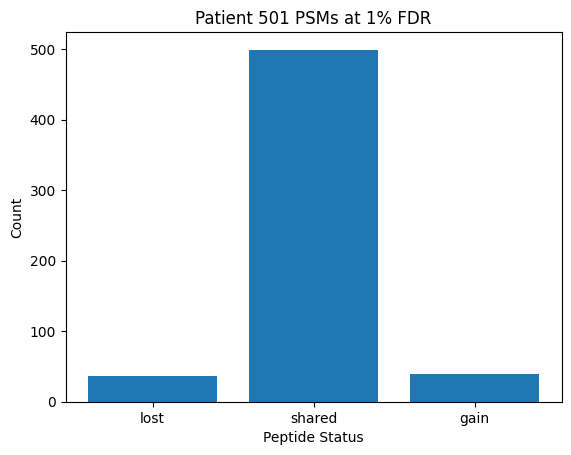

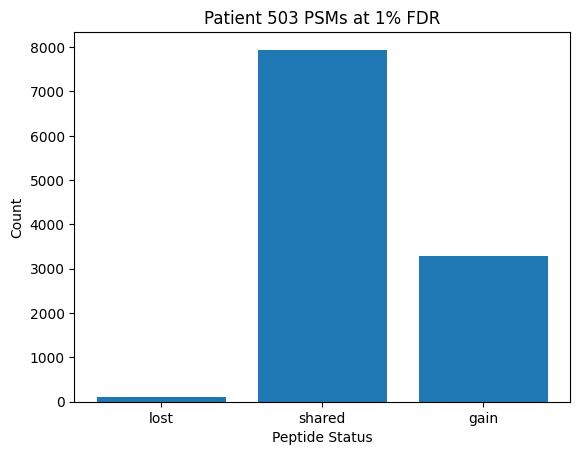

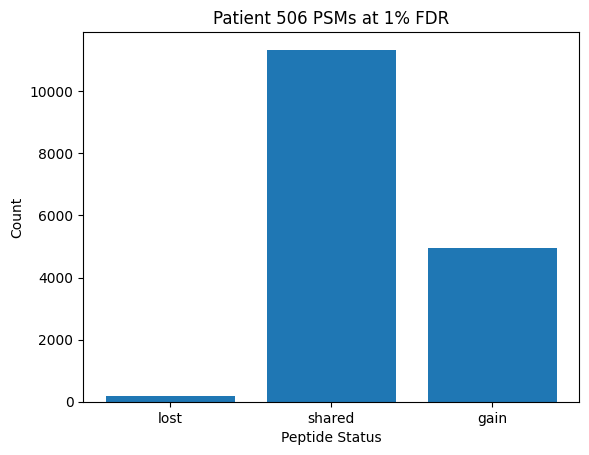

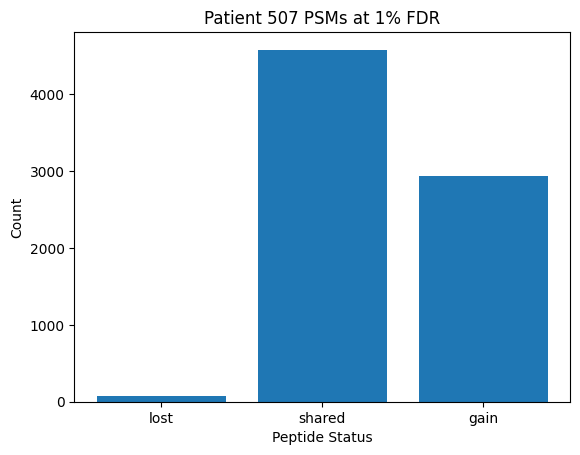

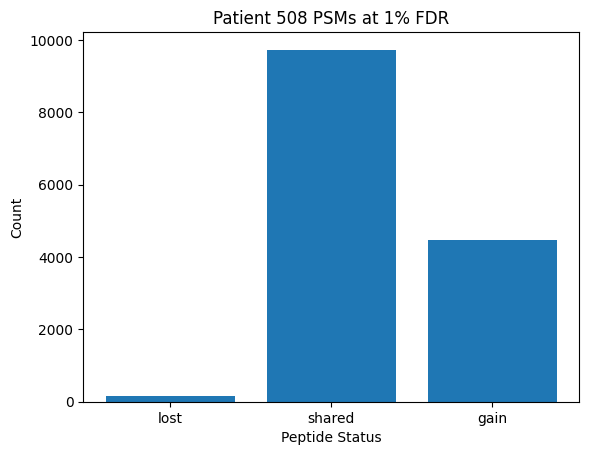

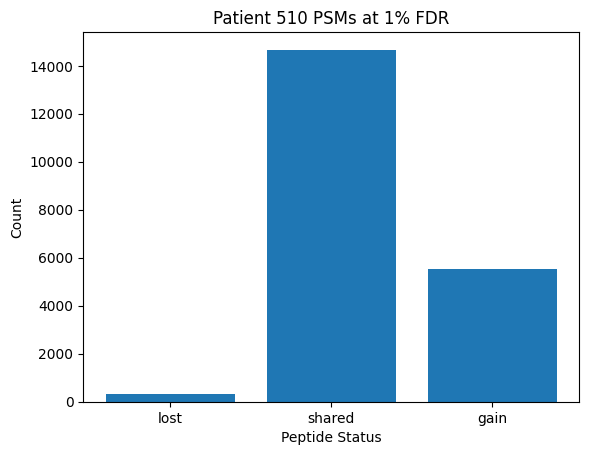

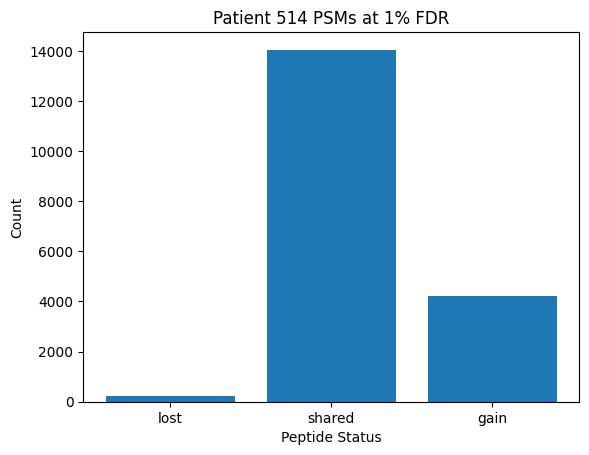

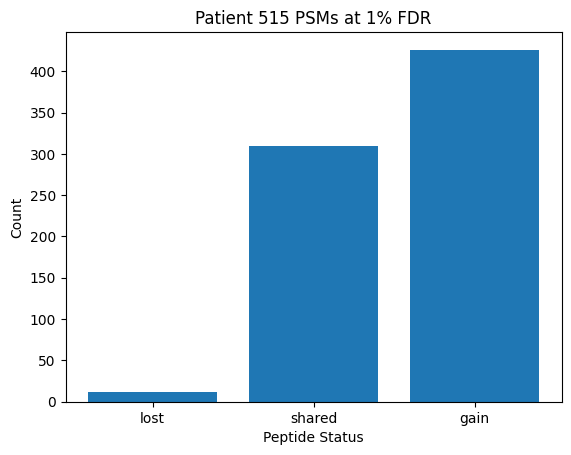

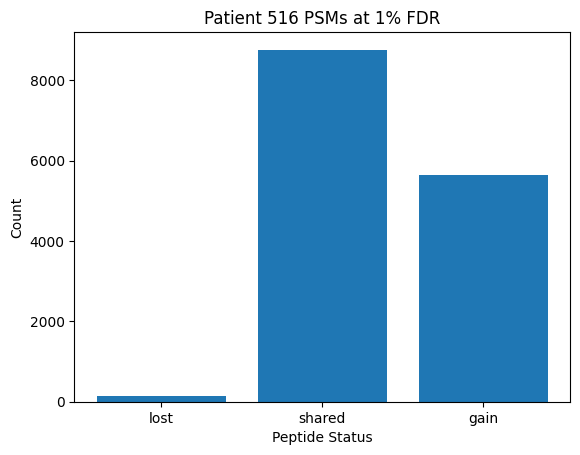

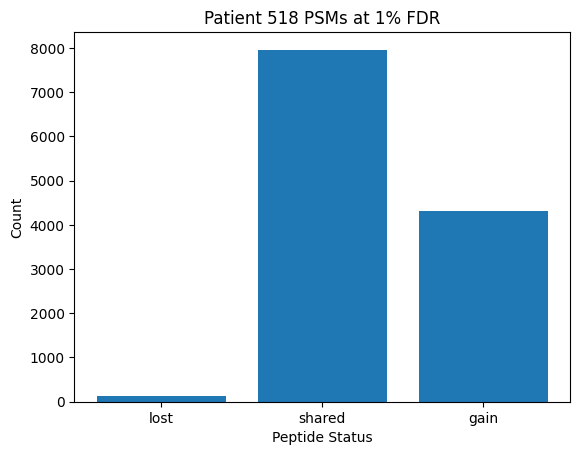

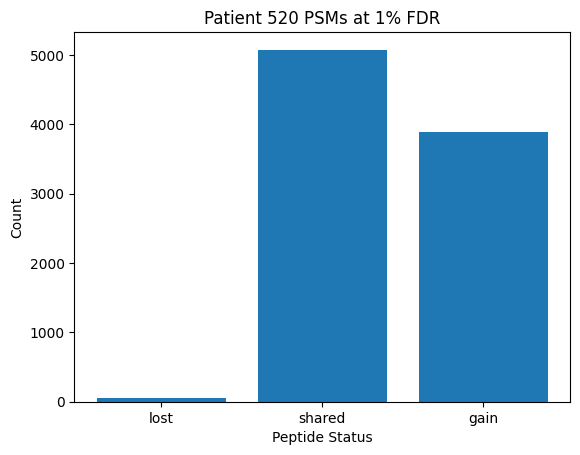

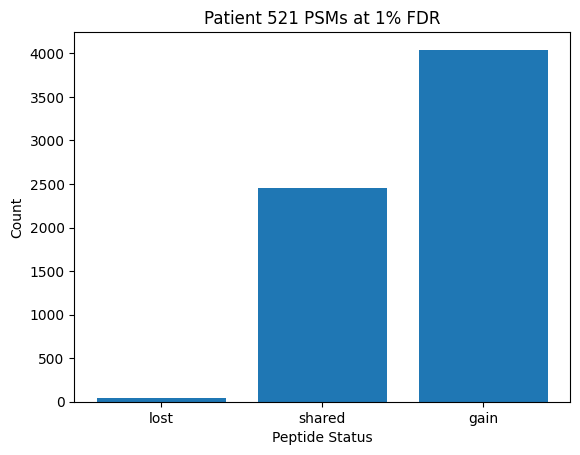

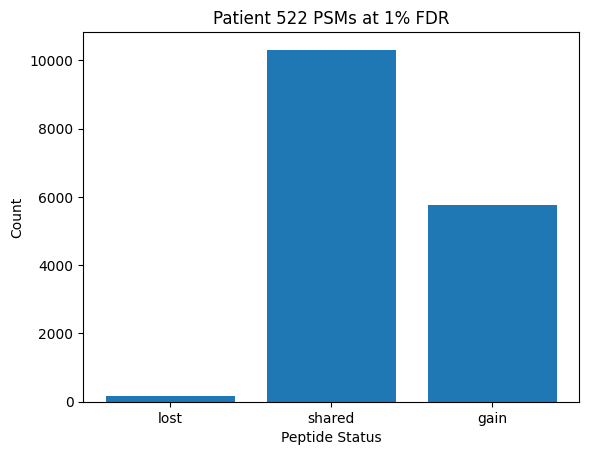

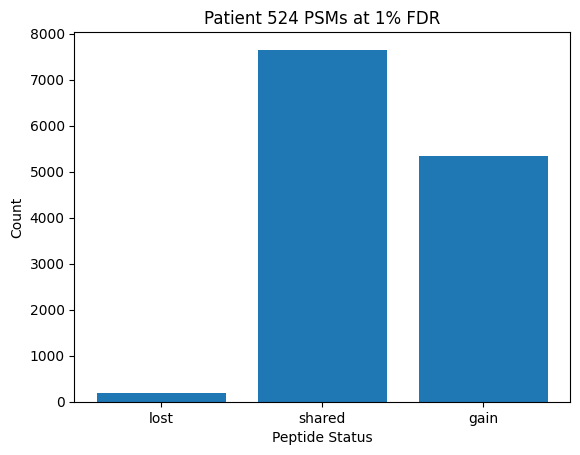

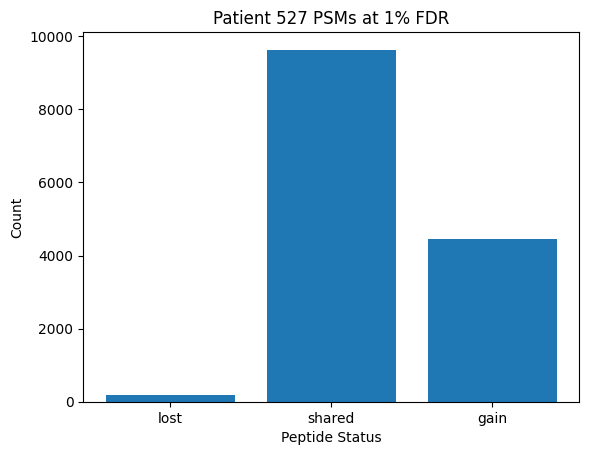

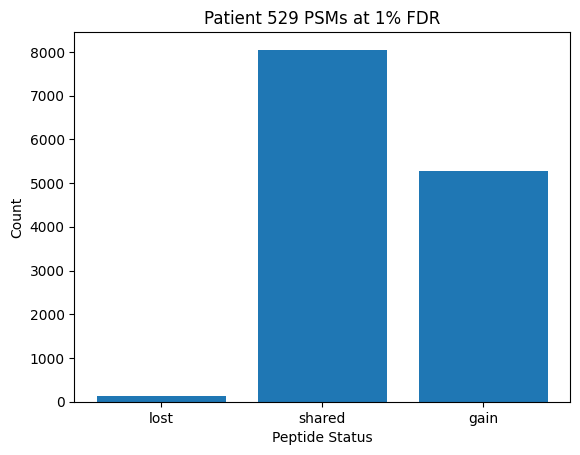

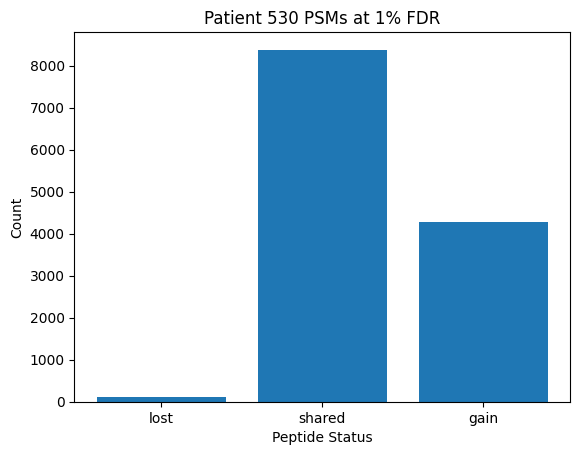

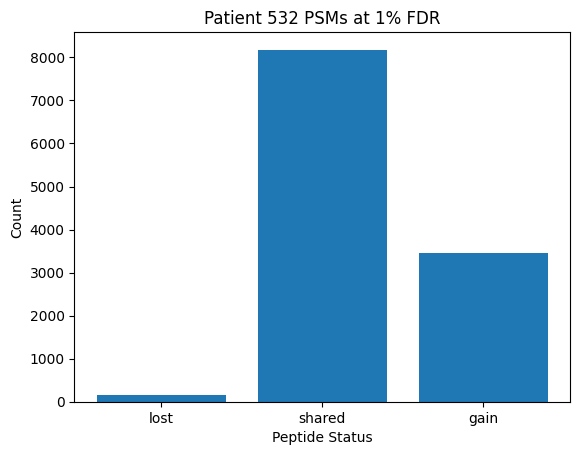

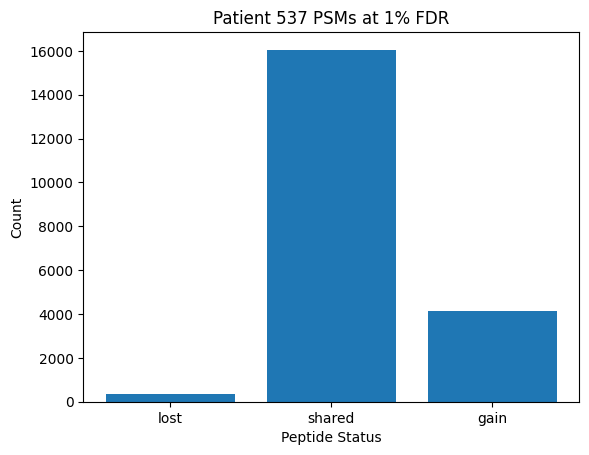

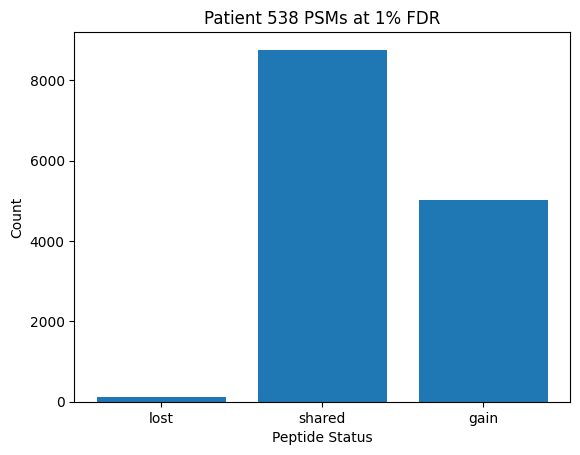

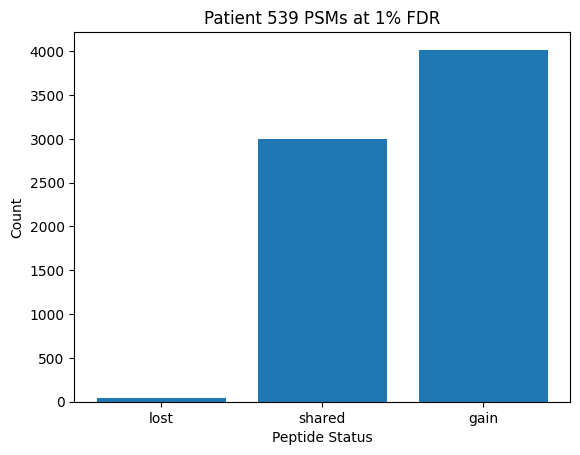

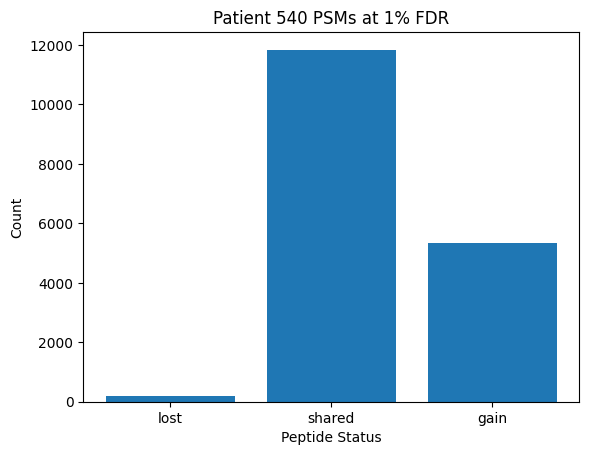

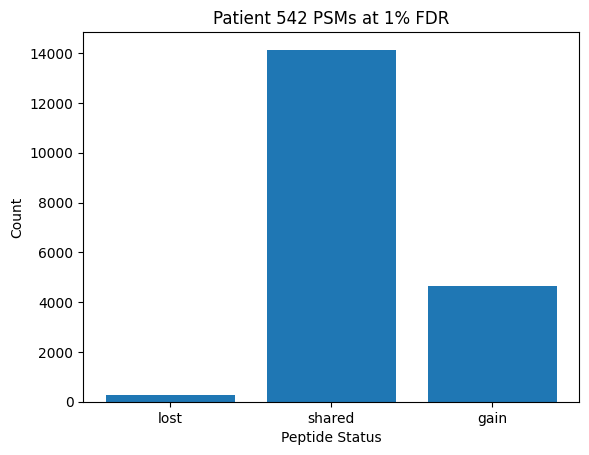

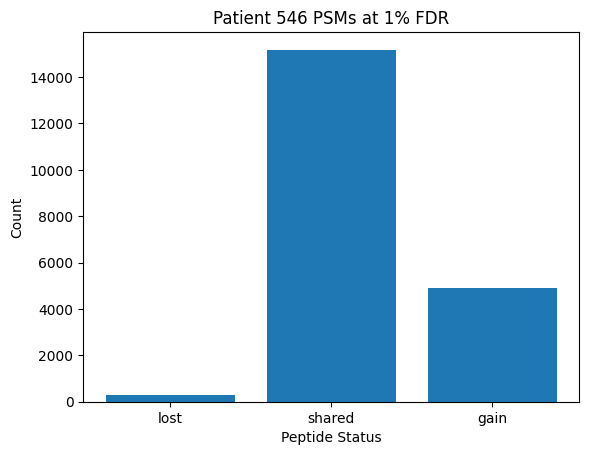

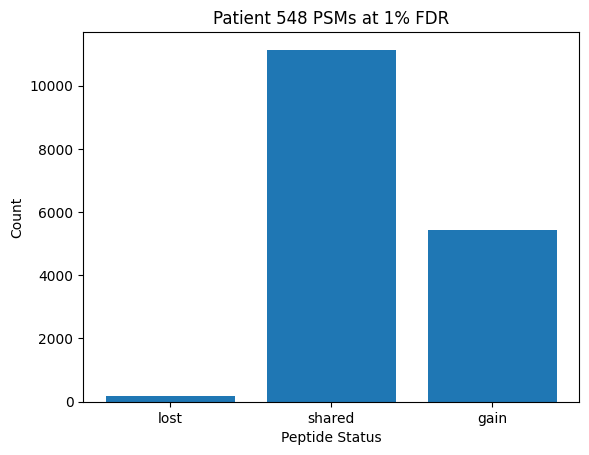

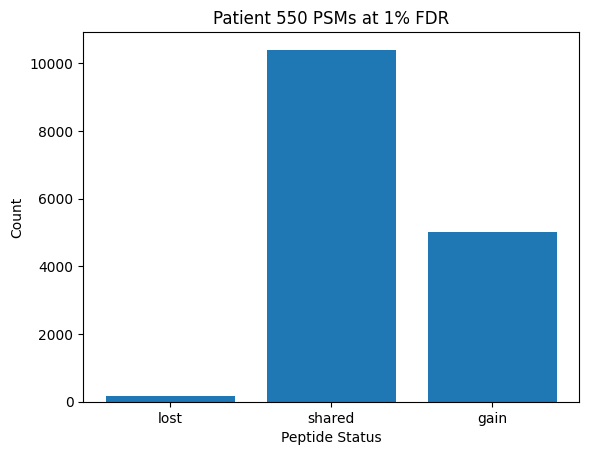

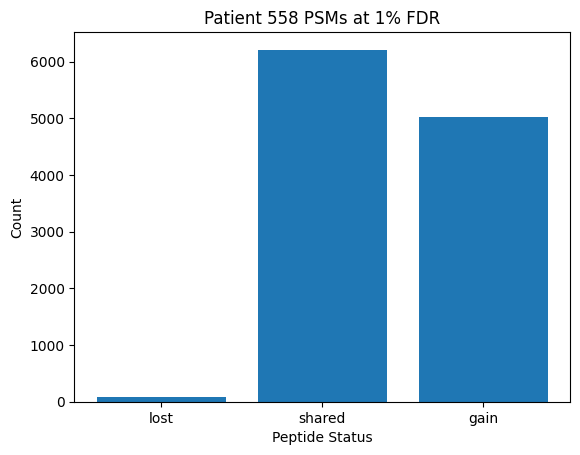

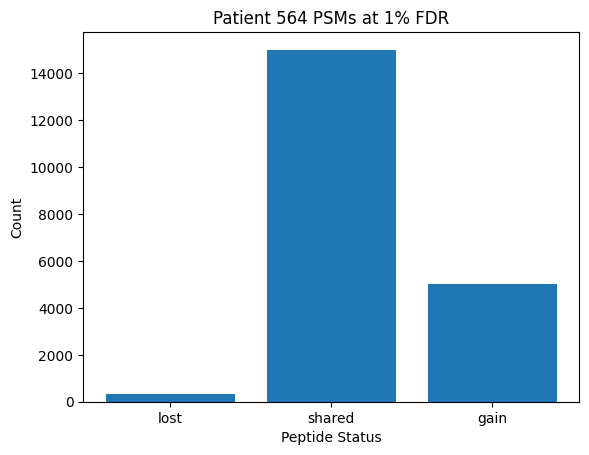

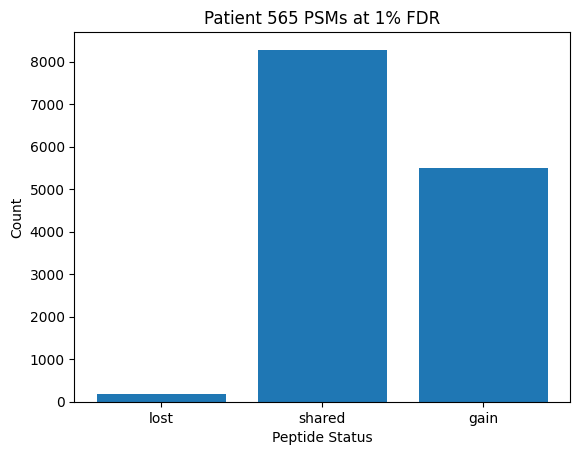

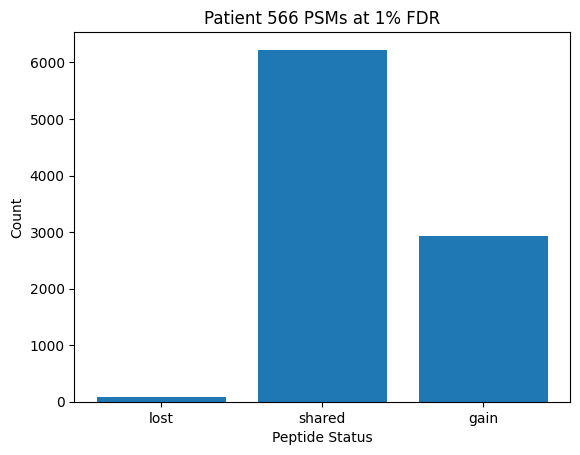

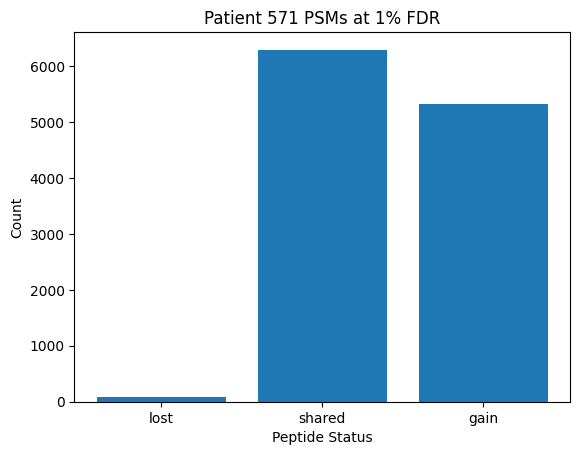

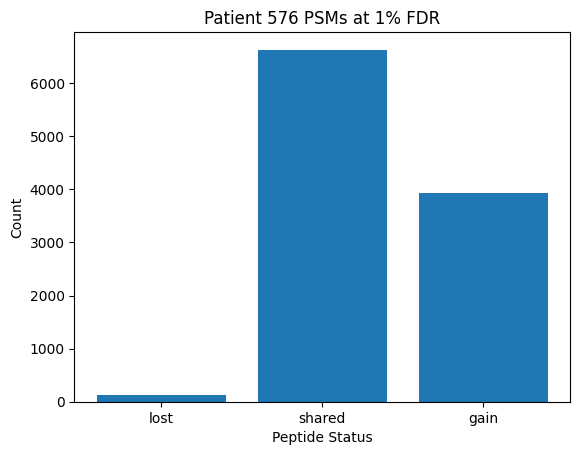

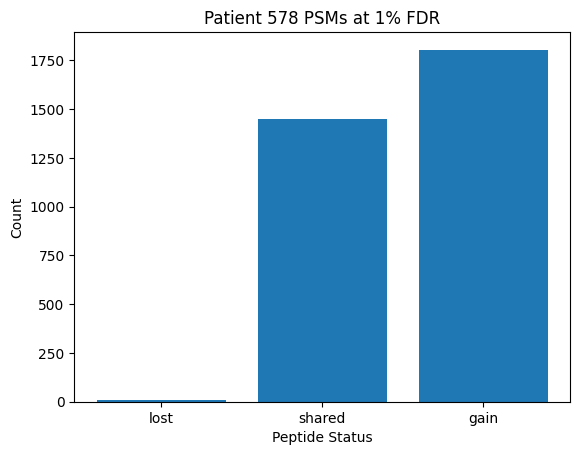

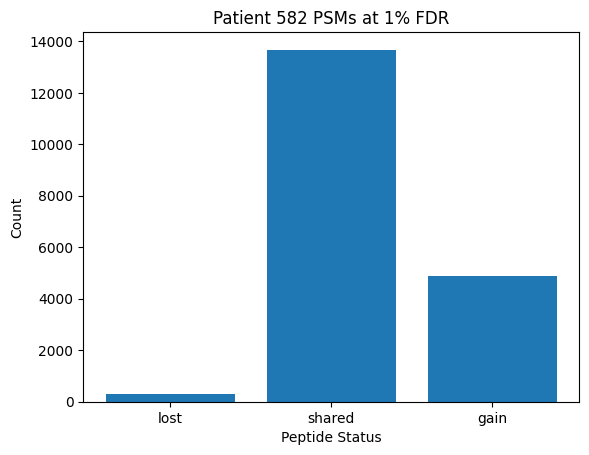

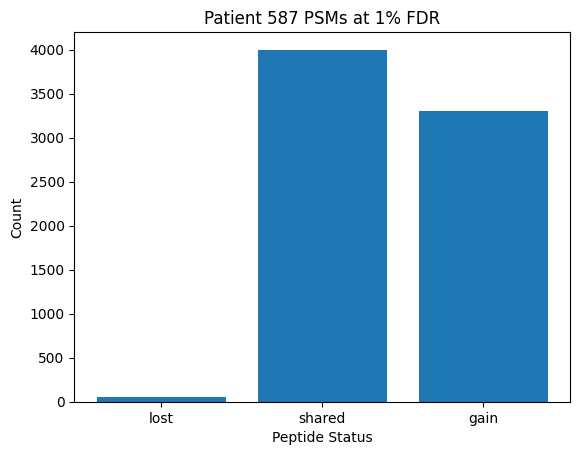

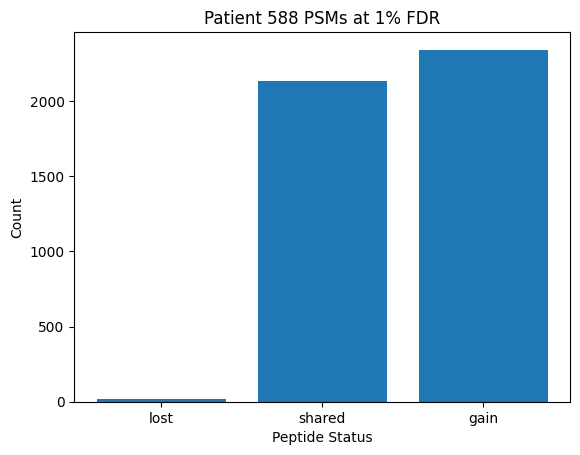

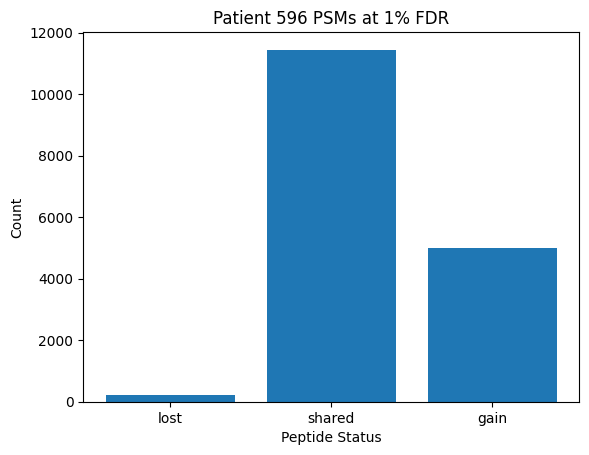

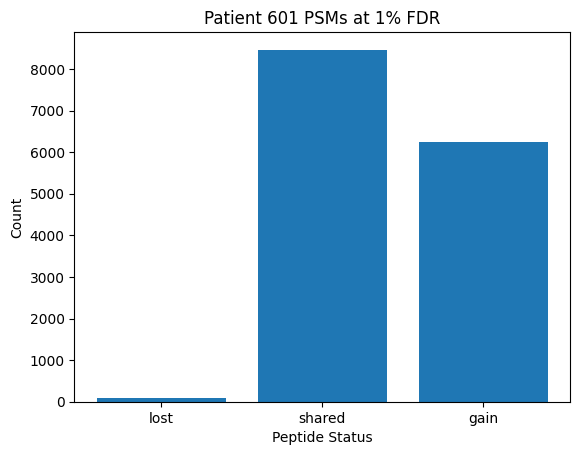

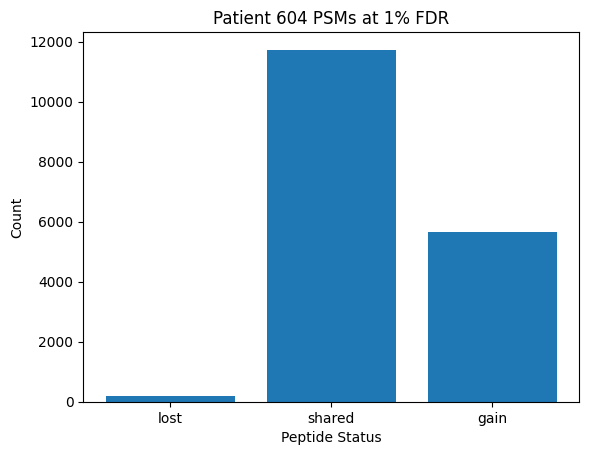

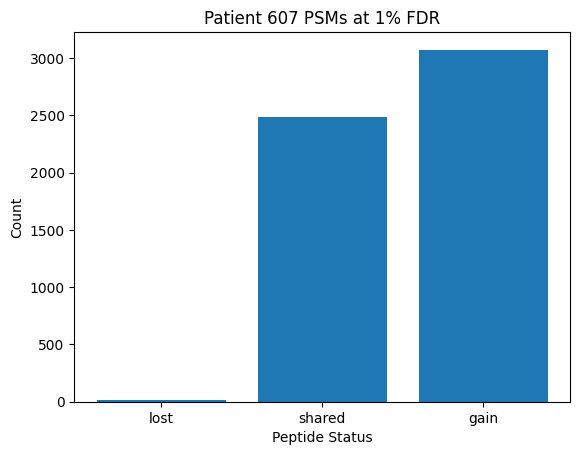

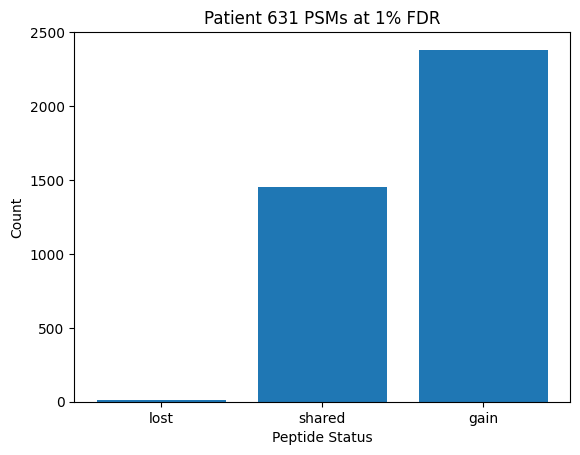

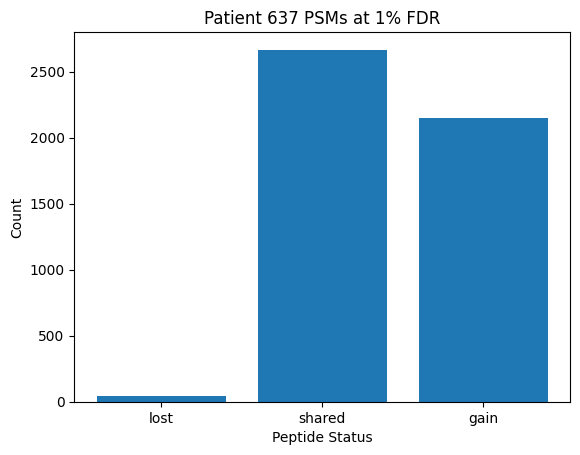

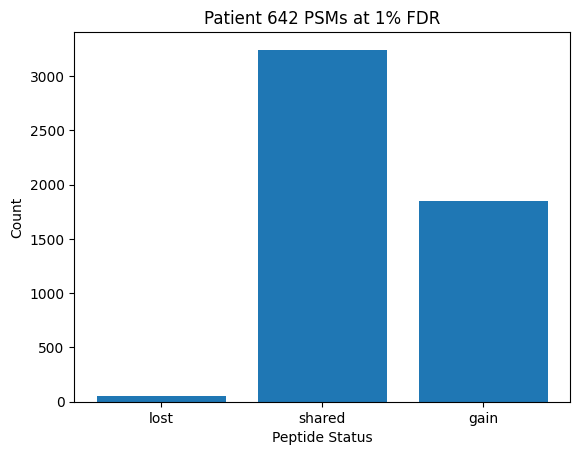

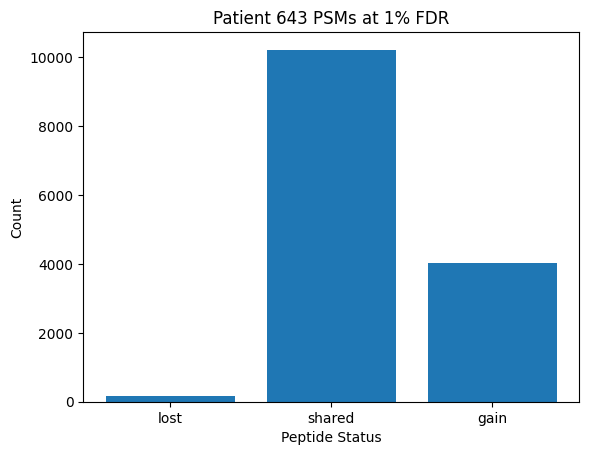

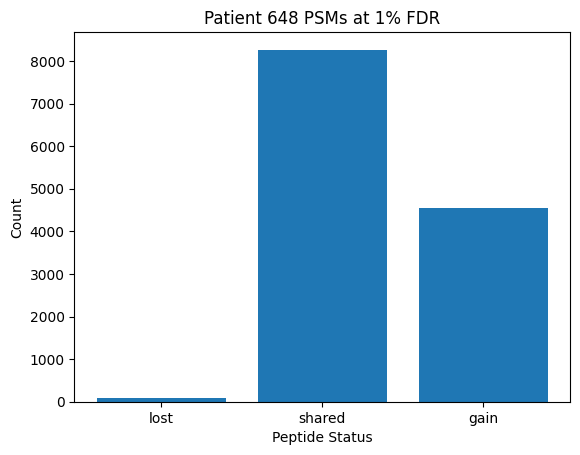

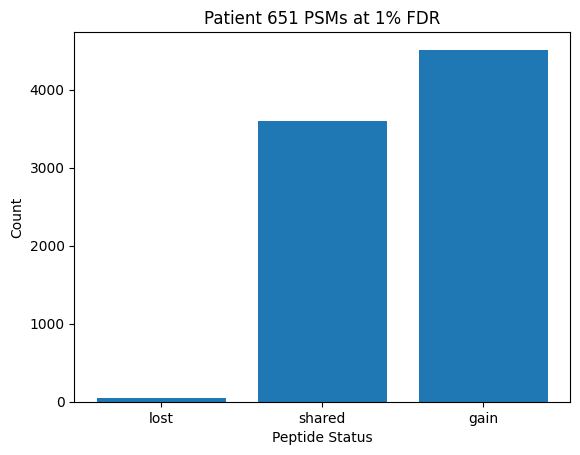

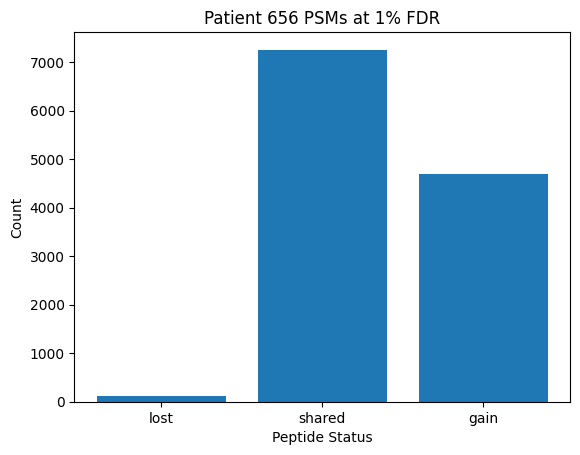

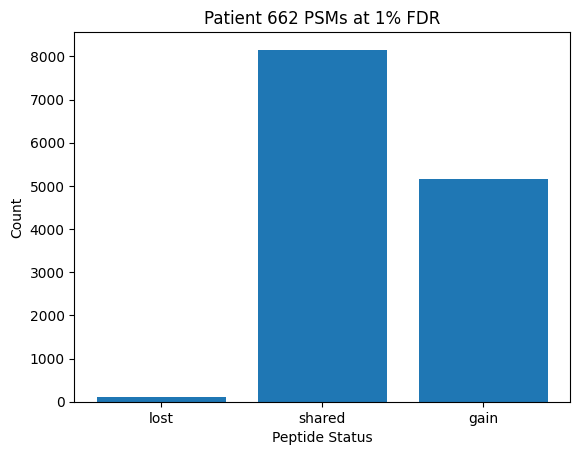

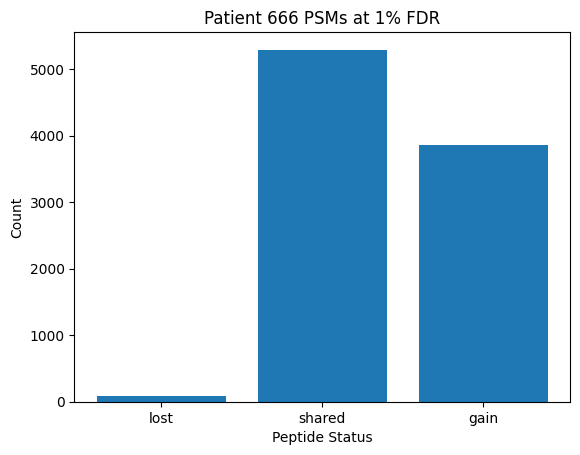

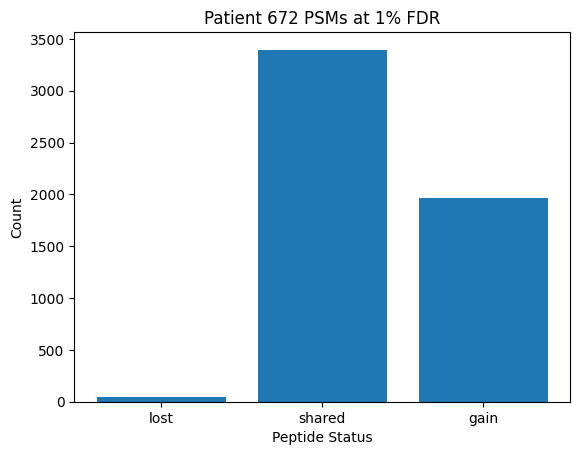

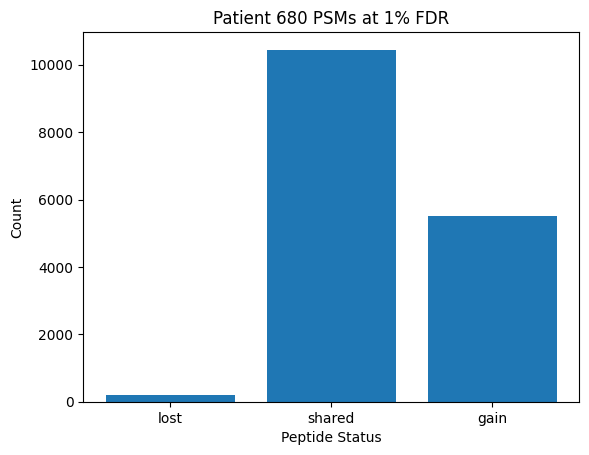

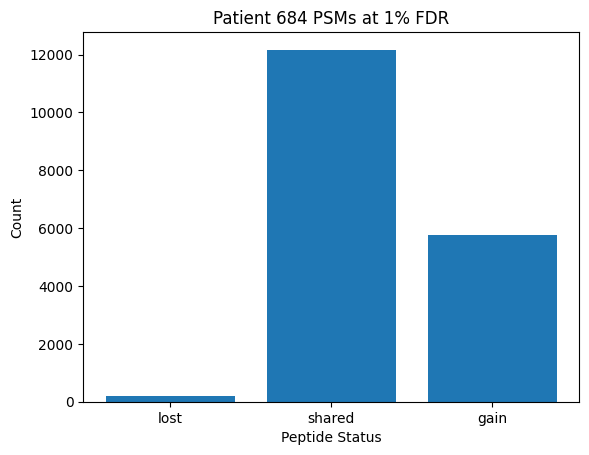

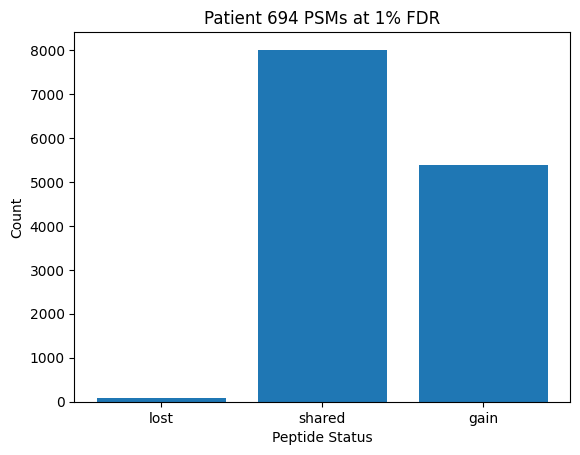

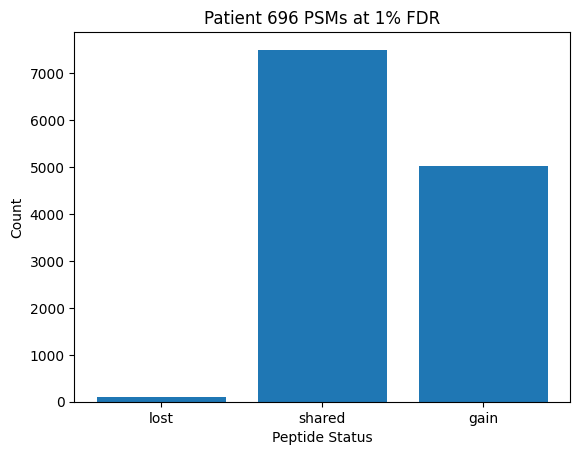

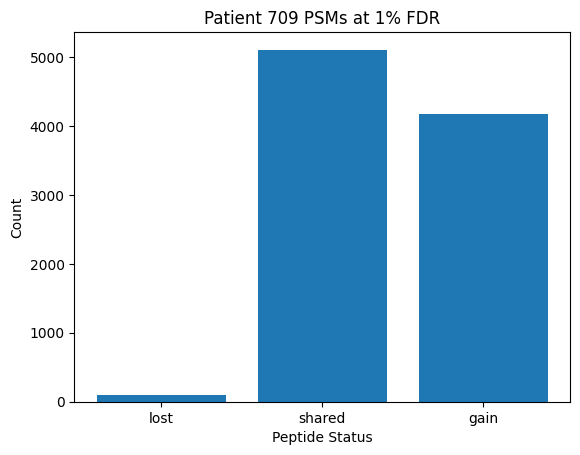

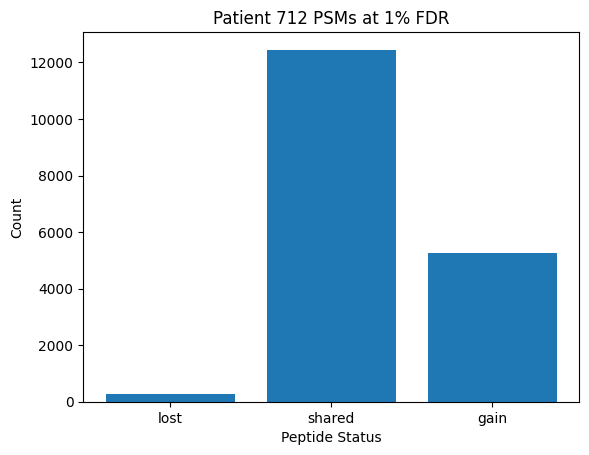

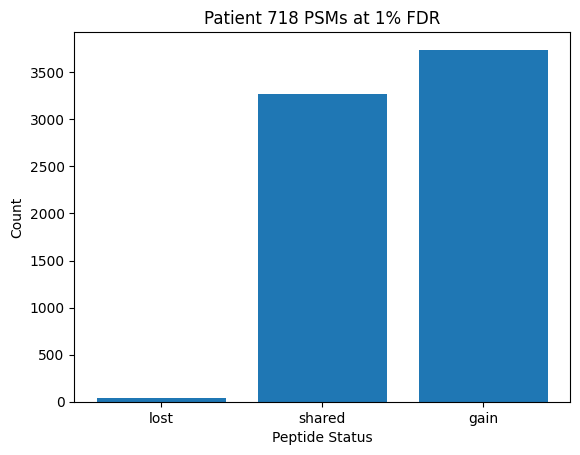

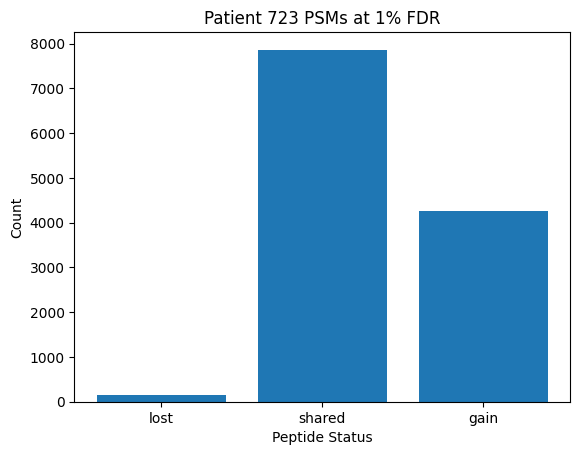

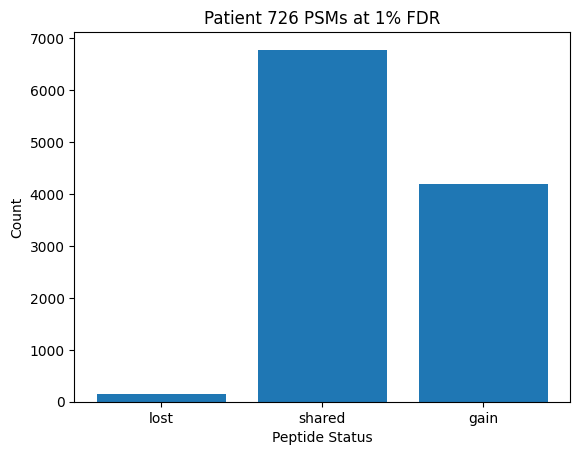

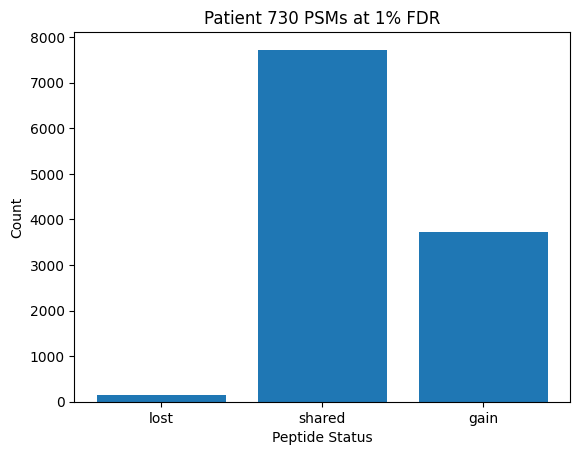

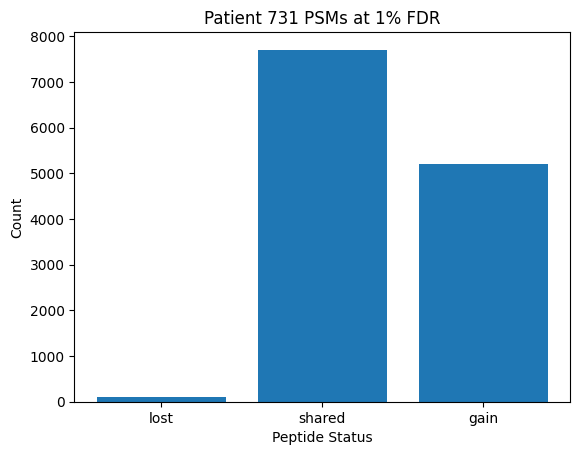

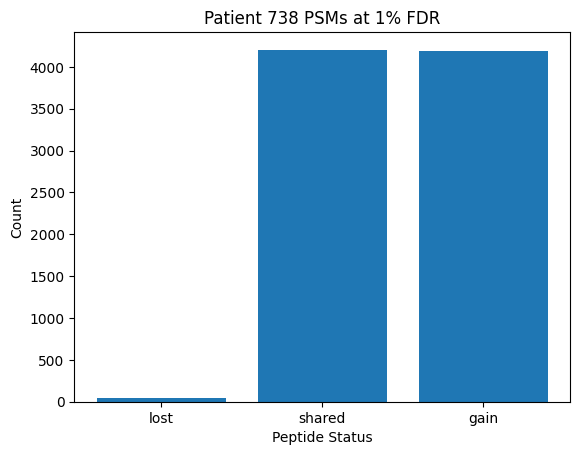

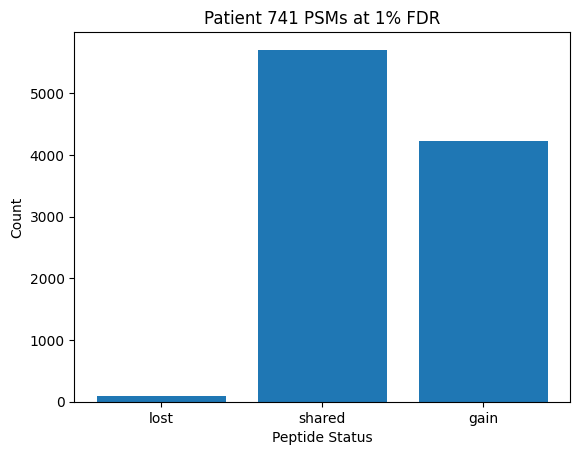

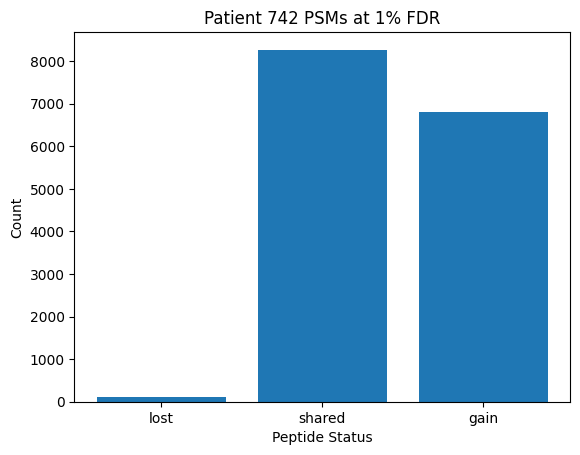

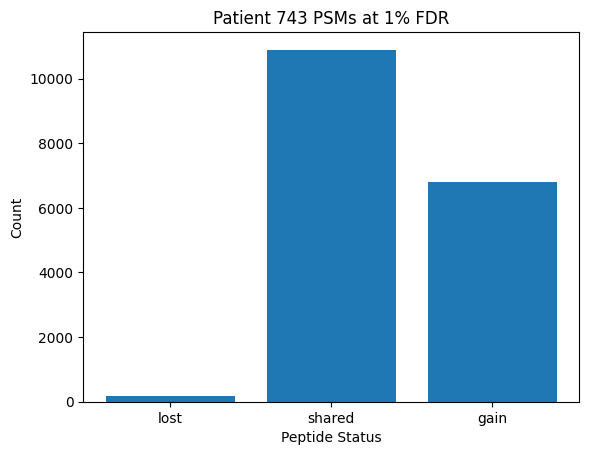

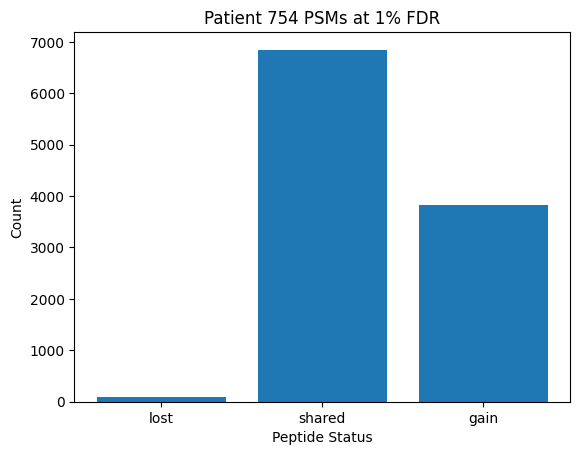

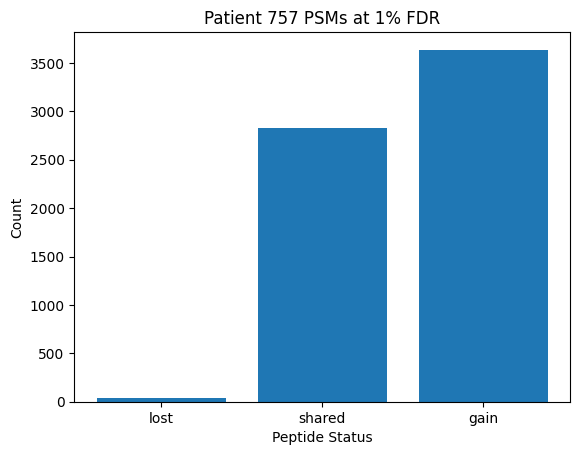

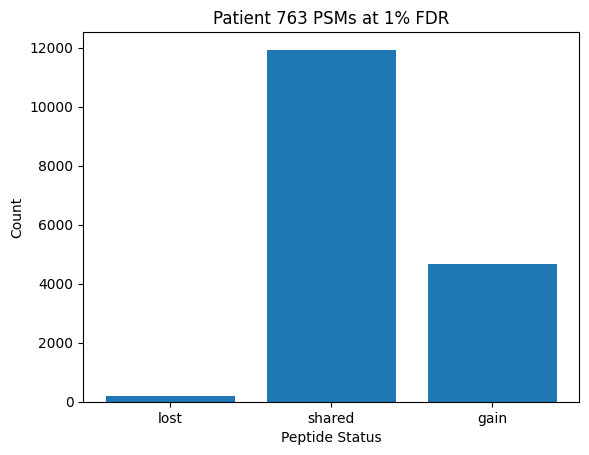

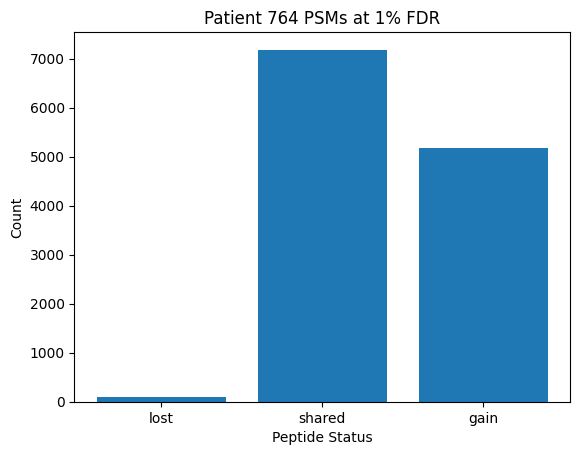

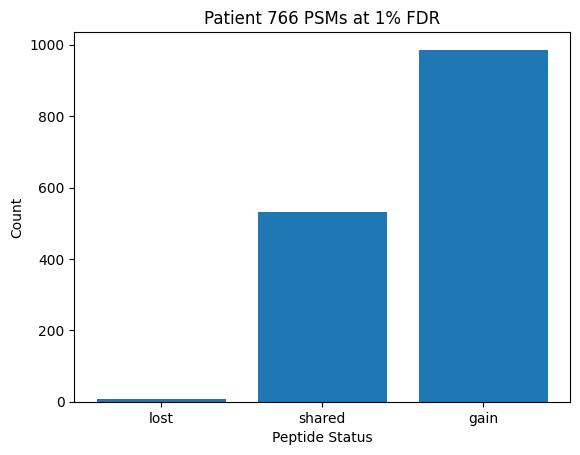

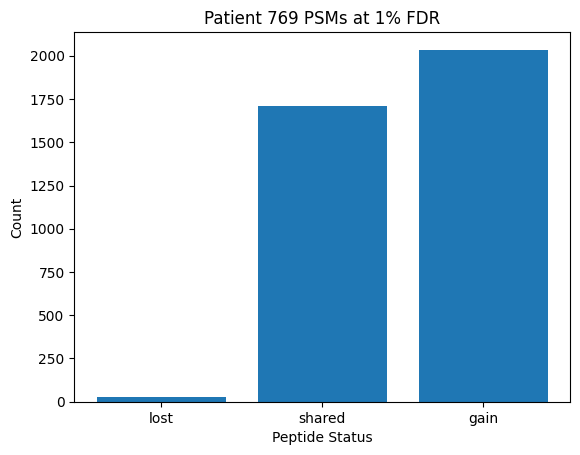

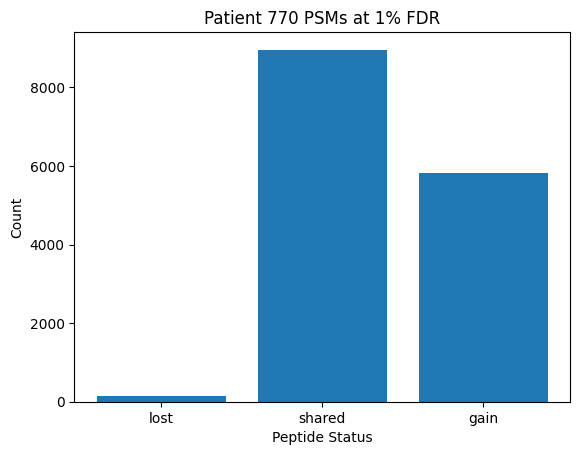

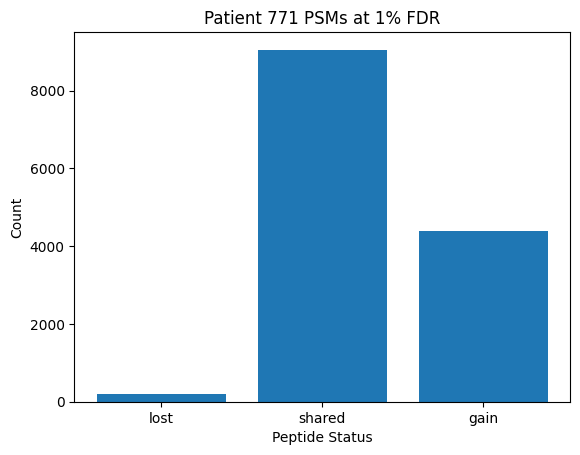

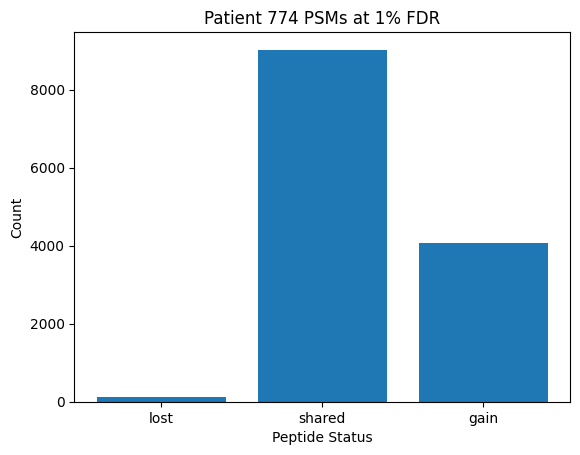

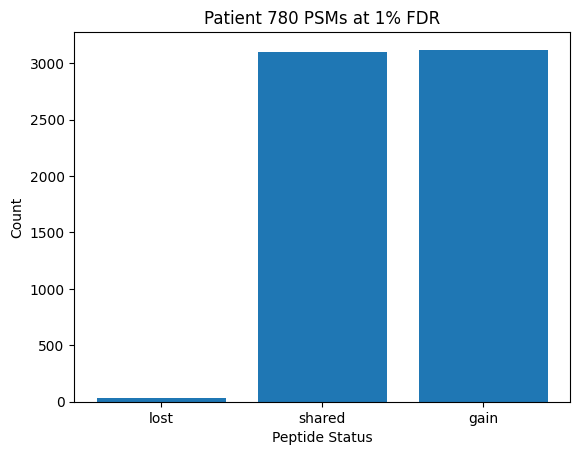

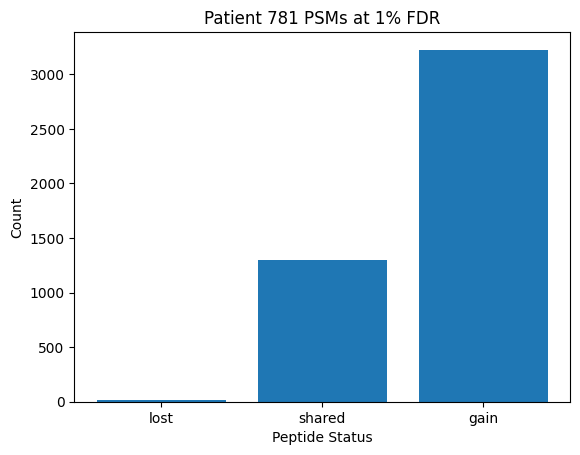

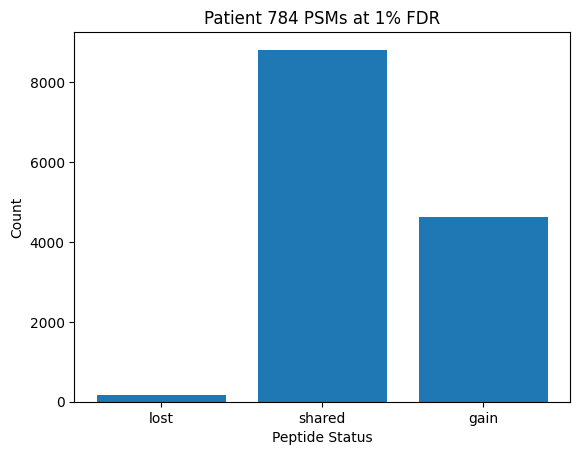

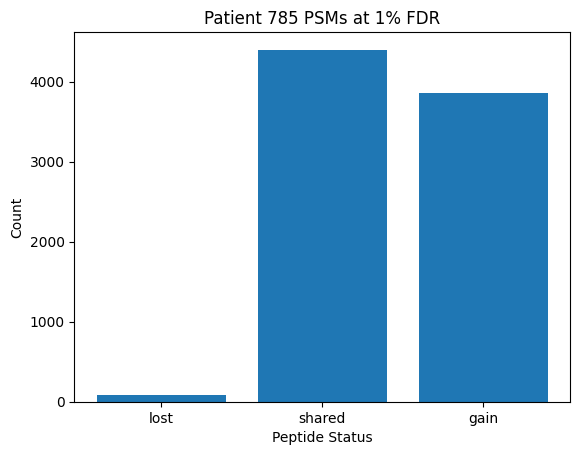

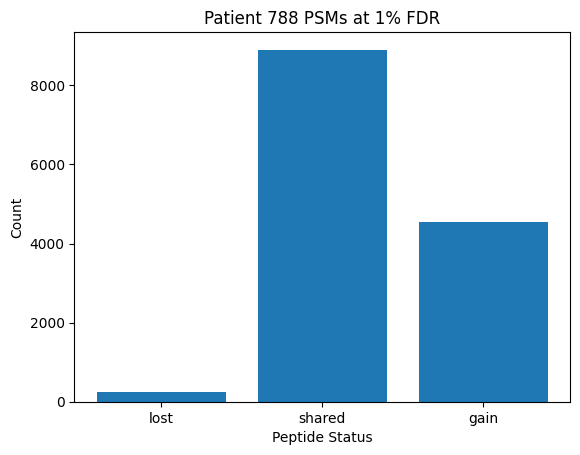

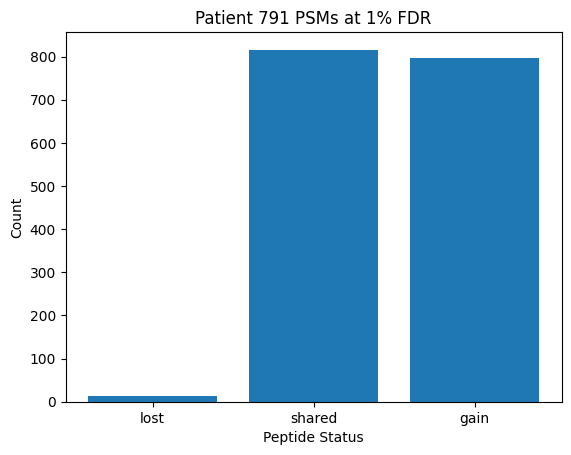

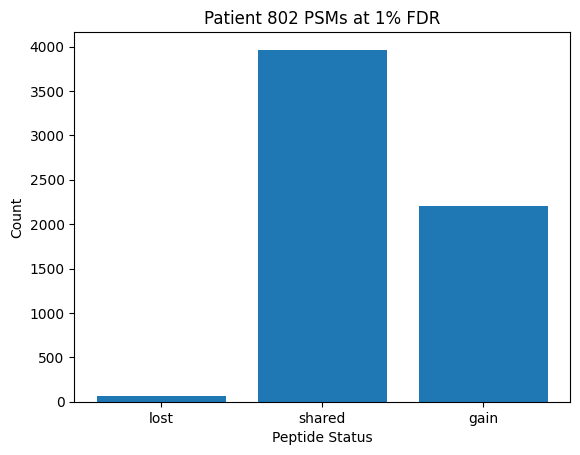

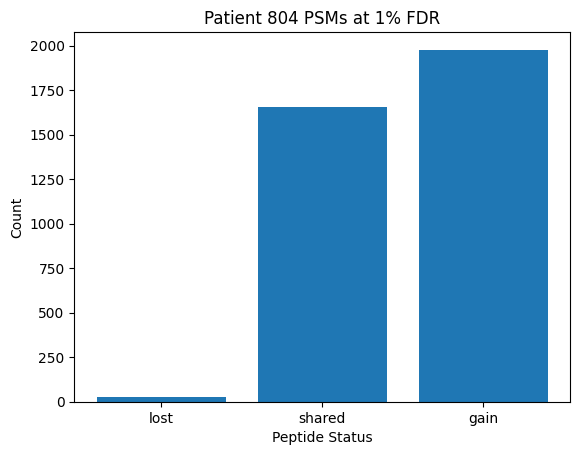

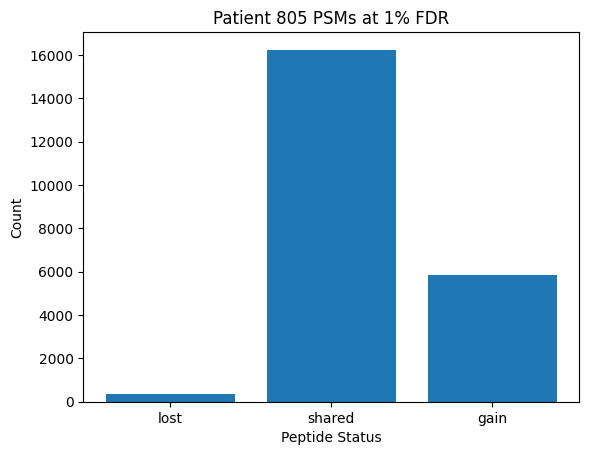

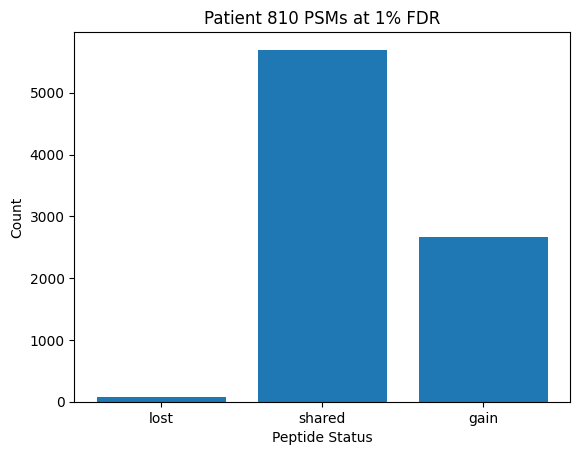

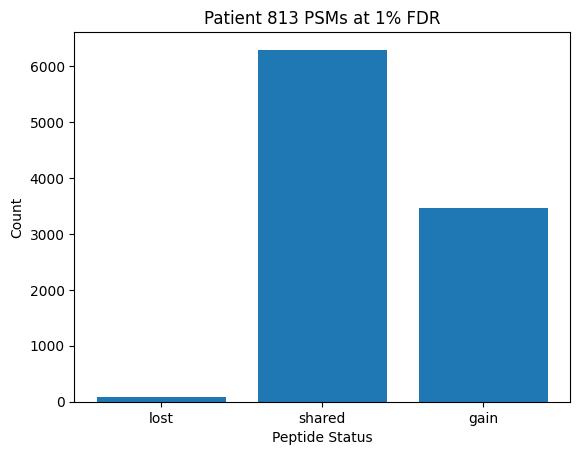

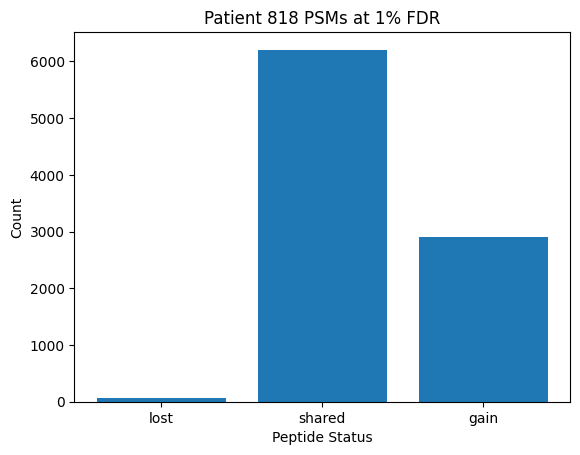

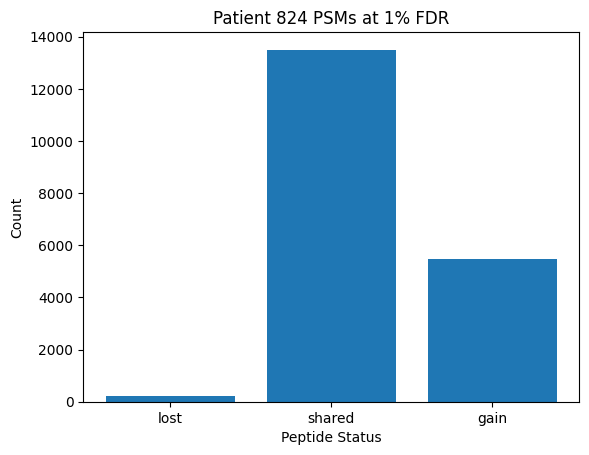

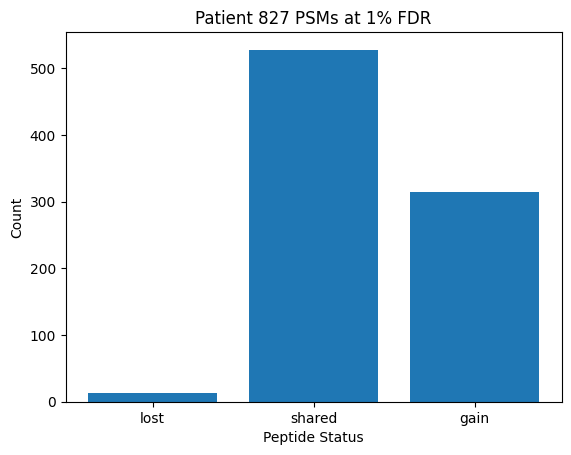

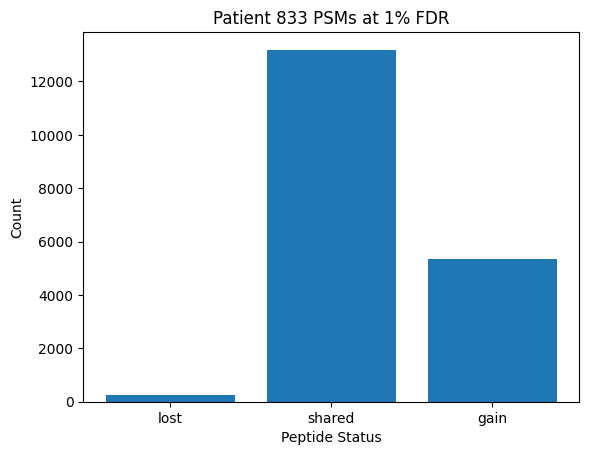

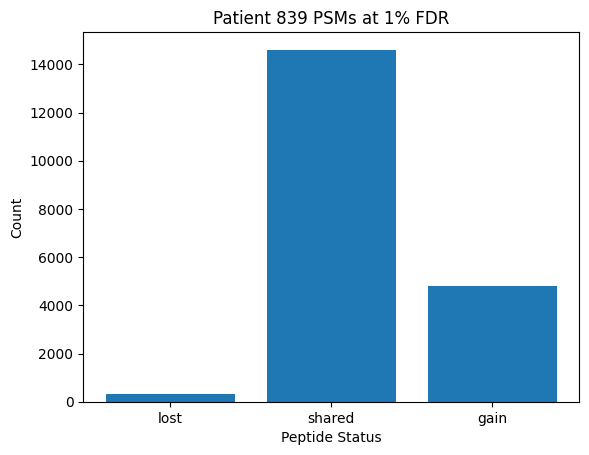

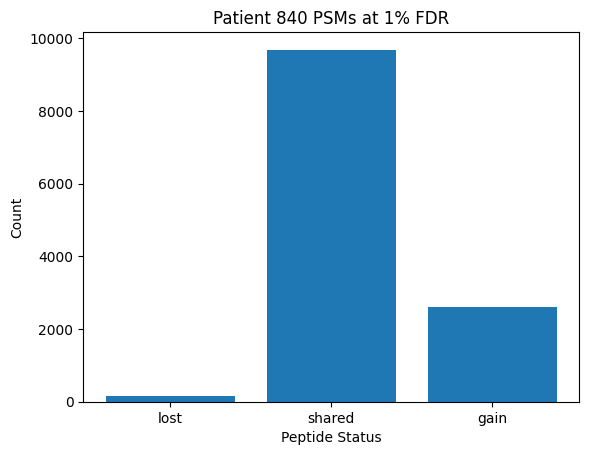

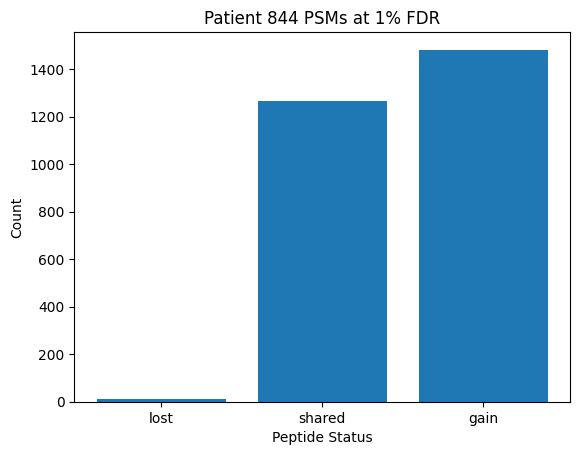

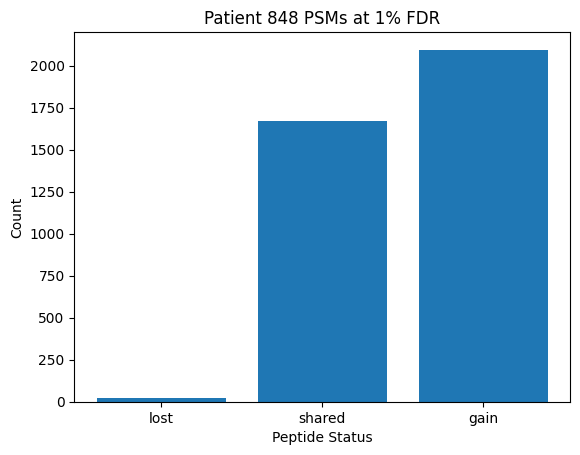

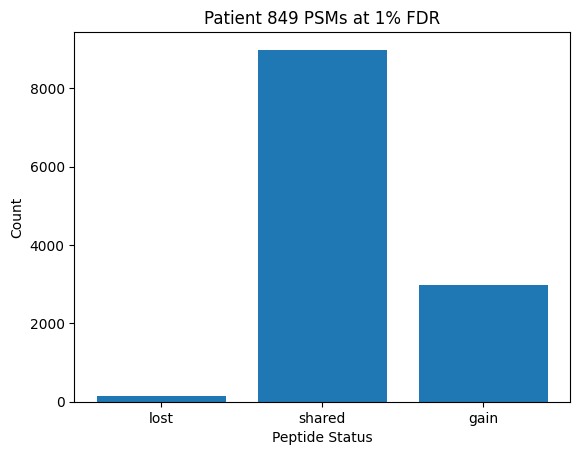

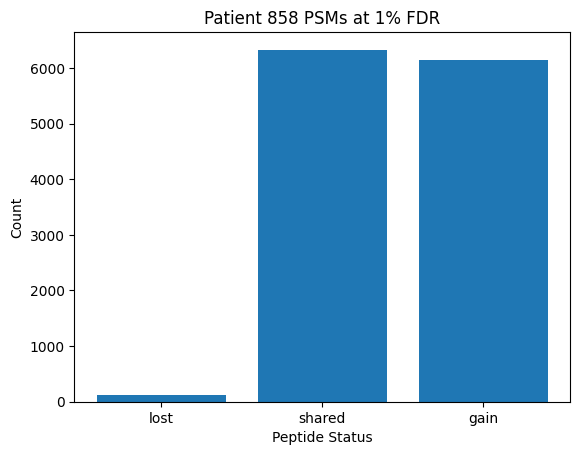

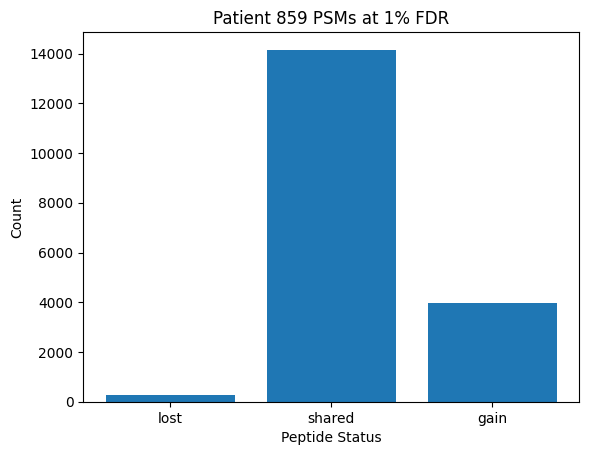

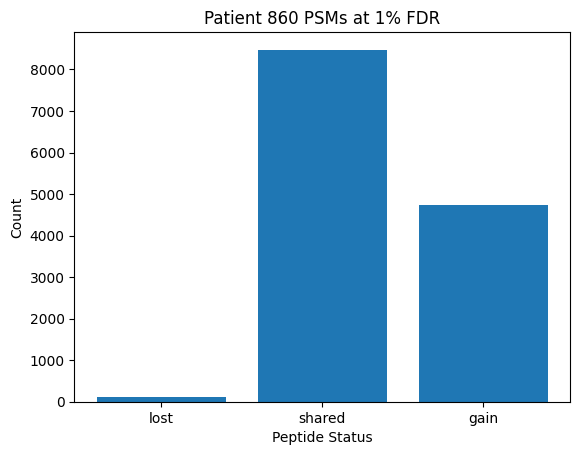

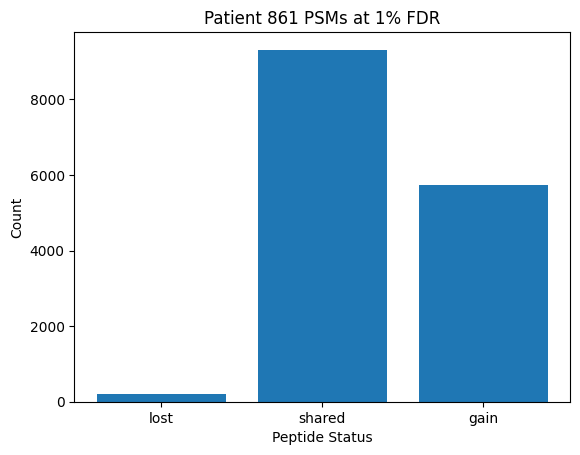

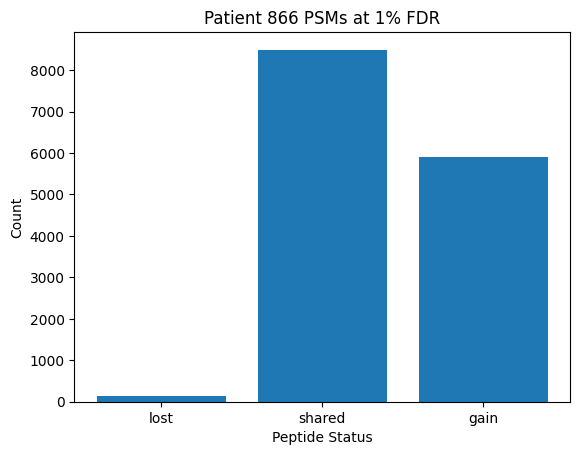

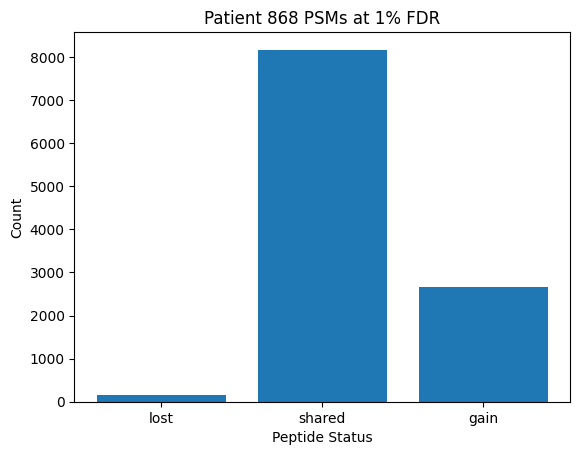

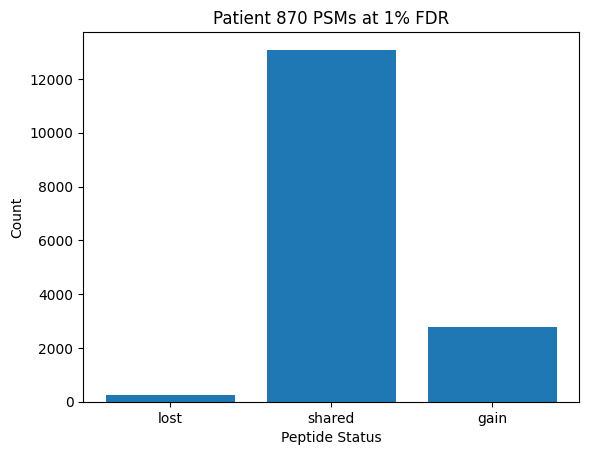

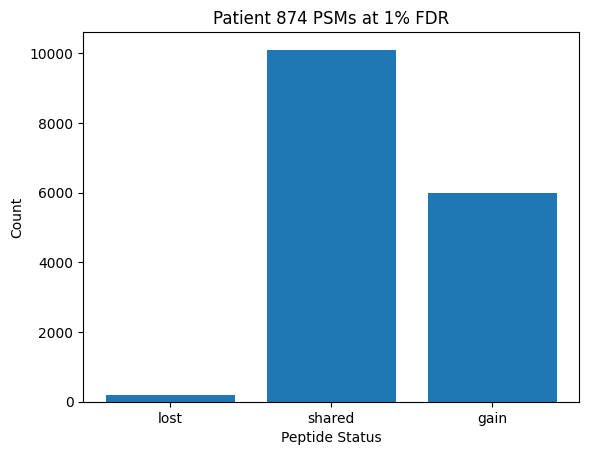

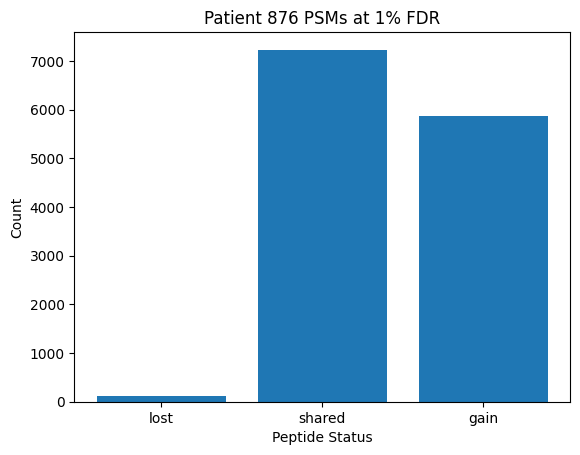

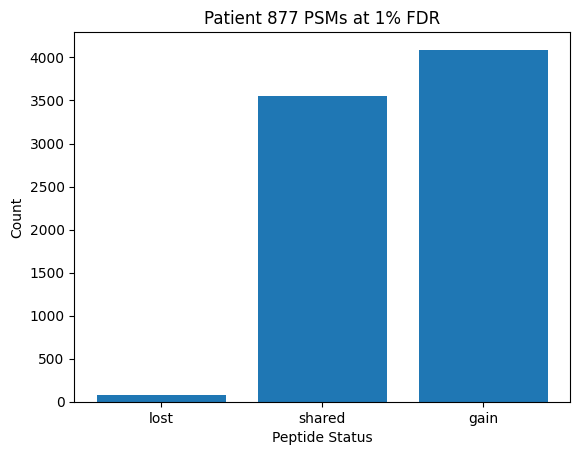

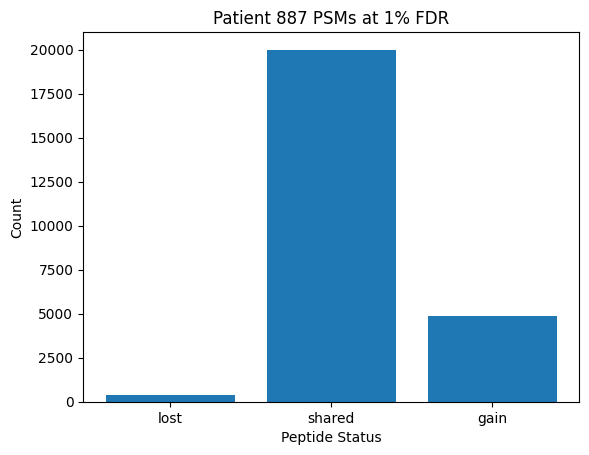

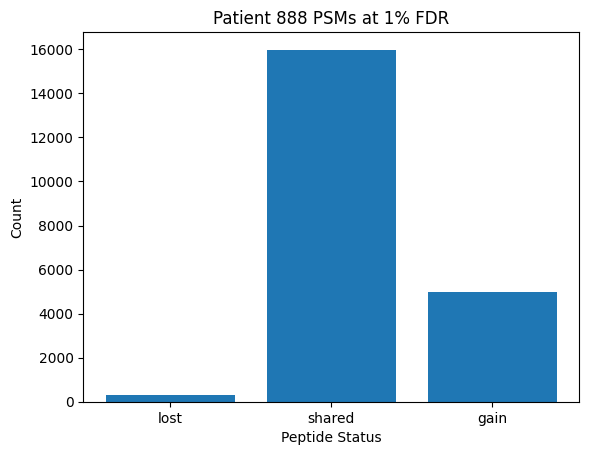

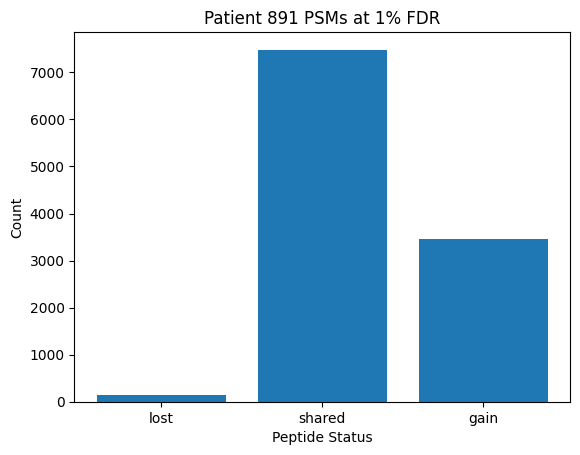

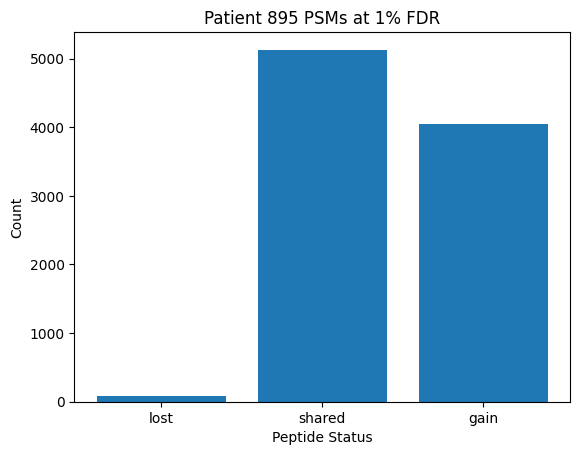

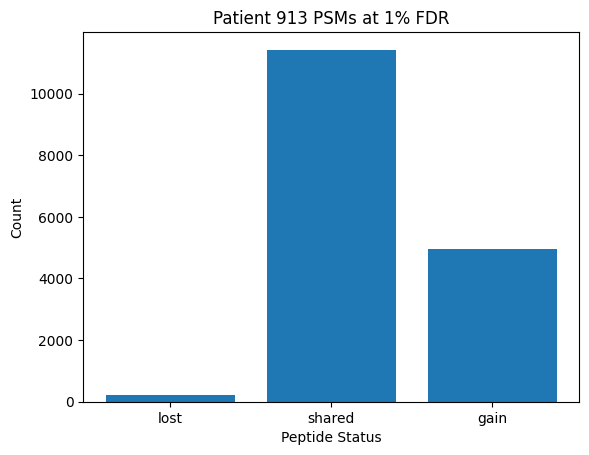

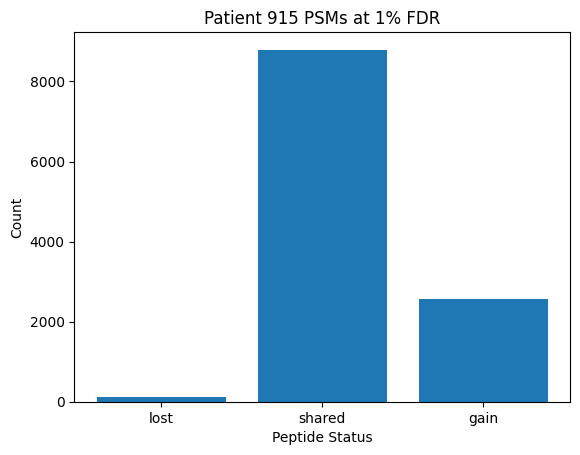

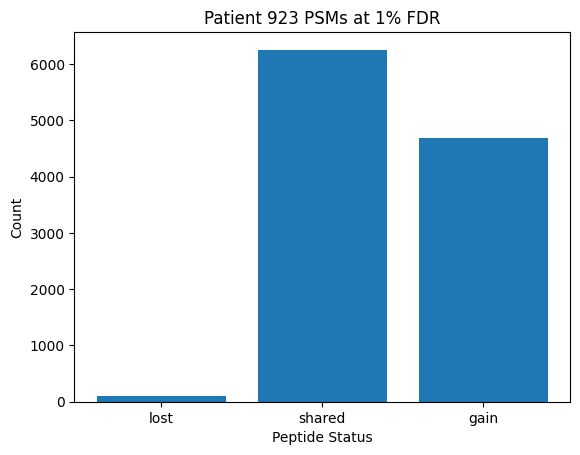

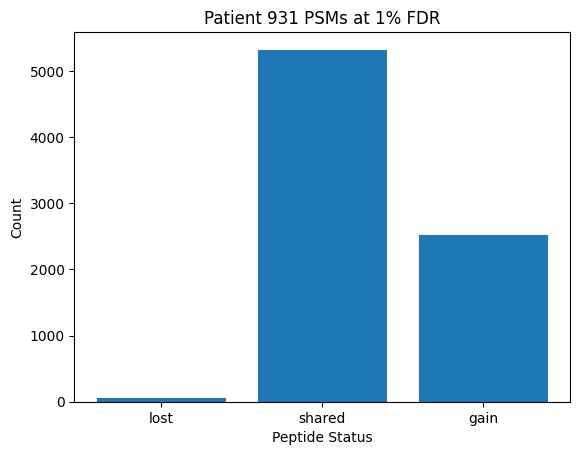

In [51]:
# Iterate over each patient
for patient_number in patient_numbers:
    # Construct file paths for the current patient
    original_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'original.percolator.psms.txt')
    rescore_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'rescore.percolator.psms.txt')
    
    # Load data files for the current patient
    percolator_output_andro = pd.read_csv(original_file_path, sep='\t')
    percolator_output_prosit = pd.read_csv(rescore_file_path, sep='\t')
    
    # Clean peptide columns
    filt_andro = clean_peptides(percolator_output_andro)
    filt_prosit = clean_peptides(percolator_output_prosit)
    
    # Filter to 1% FDR
    filt_andro = filt_andro[filt_andro['q-value'] <= 0.01]
    filt_prosit = filt_prosit[filt_prosit['q-value'] <= 0.01]

    # Calculate lost, shared, and gained peptides
    #lost = ~filt_andro['modi_peptide'].isin(filt_prosit['modi_peptide'])
    #gained = ~filt_prosit['modi_peptide'].isin(filt_andro['modi_peptide'])
    #common = filt_prosit.merge(filt_andro, how="inner", on=['modi_peptide', 'PSMId'])
    
    # Plotting
    plt.figure()
    x = ['lost', 'shared', 'gain']
    y = [lost.sum(), len(common), gained.sum()]
    plt.bar(x, y)
    plt.title(f"Patient {patient_number} PSMs at 1% FDR")
    plt.xlabel("Peptide Status")
    plt.ylabel("Count")
    plt.show()

In [11]:
# Initialize arrays to store data for plotting
lost_counts = []
shared_counts = []
gained_counts = []

# Iterate over each patient
for patient_number in patient_numbers:
    # Construct file paths for the current patient
    original_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'original.percolator.psms.txt')
    rescore_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'rescore.percolator.psms.txt')
    
    # Load data files for the current patient
    percolator_output_andro = pd.read_csv(original_file_path, sep='\t')
    percolator_output_prosit = pd.read_csv(rescore_file_path, sep='\t')
    
    # Clean peptide columns
    filt_andro = clean_peptides(percolator_output_andro)
    filt_prosit = clean_peptides(percolator_output_prosit)
    
    # Filter to 1% FDR
    filt_andro = filt_andro[filt_andro['q-value'] <= 0.01]
    filt_prosit = filt_prosit[filt_prosit['q-value'] <= 0.01]
    
    # Calculate lost, shared, and gained peptides counts
    lost_counts.append((~filt_andro['modi_peptide'].isin(filt_prosit['modi_peptide'])).sum())
    shared_counts.append(len(filt_prosit.merge(filt_andro, how="inner", on=['modi_peptide', 'PSMId'])))
    gained_counts.append((~filt_prosit['modi_peptide'].isin(filt_andro['modi_peptide'])).sum())


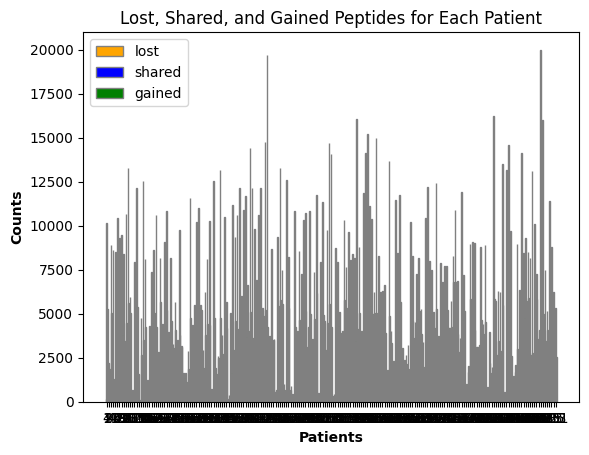

In [12]:
# Set the width of the bars
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = np.arange(len(patient_numbers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.bar(r1, lost_counts, color='orange', width=bar_width, edgecolor='grey', label='lost')
plt.bar(r2, shared_counts, color='blue', width=bar_width, edgecolor='grey', label='shared')
plt.bar(r3, gained_counts, color='green', width=bar_width, edgecolor='grey', label='gained')

# Add xticks on the middle of the group bars
plt.xlabel('Patients', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(patient_numbers))], patient_numbers)
plt.title('Lost, Shared, and Gained Peptides for Each Patient')
plt.legend()

# Show plot
plt.show()

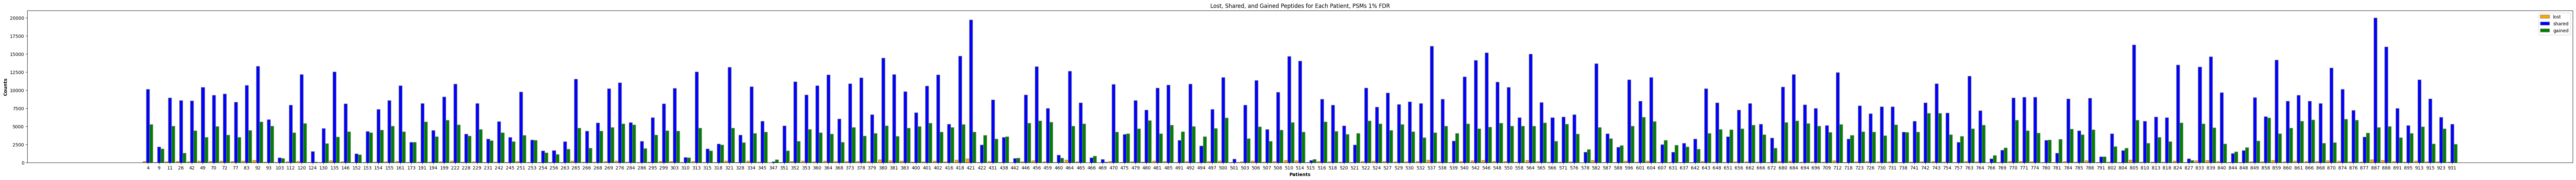

In [24]:
# Plotting
plt.figure(figsize=(100, 6))  # Adjust the figure size as needed
plt.bar(r1, lost_counts, color='orange', width=bar_width, edgecolor='grey', label='lost')
plt.bar(r2, shared_counts, color='blue', width=bar_width, edgecolor='grey', label='shared')
plt.bar(r3, gained_counts, color='green', width=bar_width, edgecolor='grey', label='gained')

# Add xticks on the middle of the group bars
plt.xlabel('Patients', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(patient_numbers))], patient_numbers)
plt.title('Lost, Shared, and Gained Peptides for Each Patient, PSMs 1% FDR')
plt.legend()

# Show plot
plt.show()

# 1. Sample specific

In [28]:
print(len(filt_andro), len(filt_andro['modi_peptide'].drop_duplicates()))

5407 3897


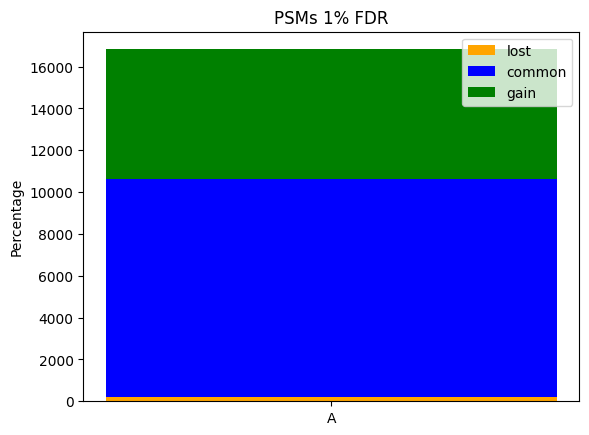

In [20]:

# geeks for geeks
# # create data
x = ['A']
y1 = lost
y2 = shared
y3 = gained
 
# plot bars in stack manner
plt.bar(x, y1, color='orange')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='g')


plt.xlabel("")
plt.ylabel("Percentage")
plt.legend(["lost", "common", "gain"])
plt.title("PSMs 1% FDR")
plt.show()

# last Tuesday work

In [80]:
counting= []

# Iterate over each patient
for patient_number in patient_numbers:
    # Construct file paths for the current patient
    original_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'original.percolator.psms.txt')
    rescore_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'rescore.percolator.psms.txt')
    
    # Load data files for the current patient
    percolator_output_andro = pd.read_csv(original_file_path, sep='\t', index_col= 0)
    percolator_output_prosit = pd.read_csv(rescore_file_path, sep='\t', index_col= 0)

    #display(percolator_output_andro.head())
    #display(percolator_output_prosit.head())


    x= pd.concat([percolator_output_andro, percolator_output_prosit], axis=1, keys= ["andro", "prosit"])
    #display(x.head())
    
    gain= x[x[("andro", "peptide")].isna()]
    #display(gain.head())

    lost= x[x[("prosit", "peptide")].isna()]
    #display(lost.head())

    common= x[(~x[("prosit", "peptide")].isna()) & (~x[("andro", "peptide")].isna())]
    #display(common.head())
   
    counting.append({
        "patients_number" : patient_number,
        "lost" : len(lost),
        "gain": len(gain),
        "common": len(common),
    })
    
    #break



new_df= pd.DataFrame(counting)
display(new_df.head())
print(new_df.shape)

patients_number  lost  gain  common
0                4  2339  2617   29138
1                9  2390  2308   20957
2               11  2820  3121   27289
3               26  2499  2574   24241
4               42  2548  2665   27070

(212, 4)


In [81]:
counting= []

# Iterate over each patient
for patient_number in patient_numbers:
    # Construct file paths for the current patient
    original_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'original.percolator.psms.txt')
    rescore_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'rescore.percolator.psms.txt')
    
    # Load data files for the current patient
    percolator_output_andro = pd.read_csv(original_file_path, sep='\t', index_col= 0)
    percolator_output_prosit = pd.read_csv(rescore_file_path, sep='\t', index_col= 0)
    
    #display(percolator_output_andro.head())
    #display(percolator_output_prosit.head())

    a_indx= set(percolator_output_andro.index)
    p_indx= set(percolator_output_prosit.index)
    
    common= a_indx.intersection(p_indx)
    gain= p_indx.union(a_indx)-a_indx
    lost= p_indx.union(a_indx)-p_indx
   
    counting.append({
        "patients_number" : patient_number,
        "lost" : len(lost),
        "common": len(common),
        "gain": len(gain),
    })
    
    #break

set_df= pd.DataFrame(counting)
display(set_df.head())
print(set_df.shape)

patients_number  lost  common  gain
0                4  2339   29138  2617
1                9  2390   20957  2308
2               11  2820   27289  3121
3               26  2499   24241  2574
4               42  2548   27070  2665

(212, 4)


In [86]:
bar_set= set_df.set_index("patients_number")
display(bar_set.head(20))

lost  common  gain
patients_number                    
4                2339   29138  2617
9                2390   20957  2308
11               2820   27289  3121
26               2499   24241  2574
42               2548   27070  2665
49               2672   27573  2782
70               2391   28169  2556
72               2590   26517  2787
77               2881   26506  3019
83               2654   28058  2858
92               3173   31167  3596
93               2782   25417  3009
103              2515   18338  2437
112              2889   27325  3110
120              2622   30986  2902
124               982   15425   954
130              2147   22652  2183
135              2864   29123  3013
146              2426   26798  2567
152              1959   19155  1915

Text(0.5, 1.0, 'Lost, Shared, and Gained Peptides for Each Patient at 1% FDR')

<Figure size 10000x800 with 0 Axes>

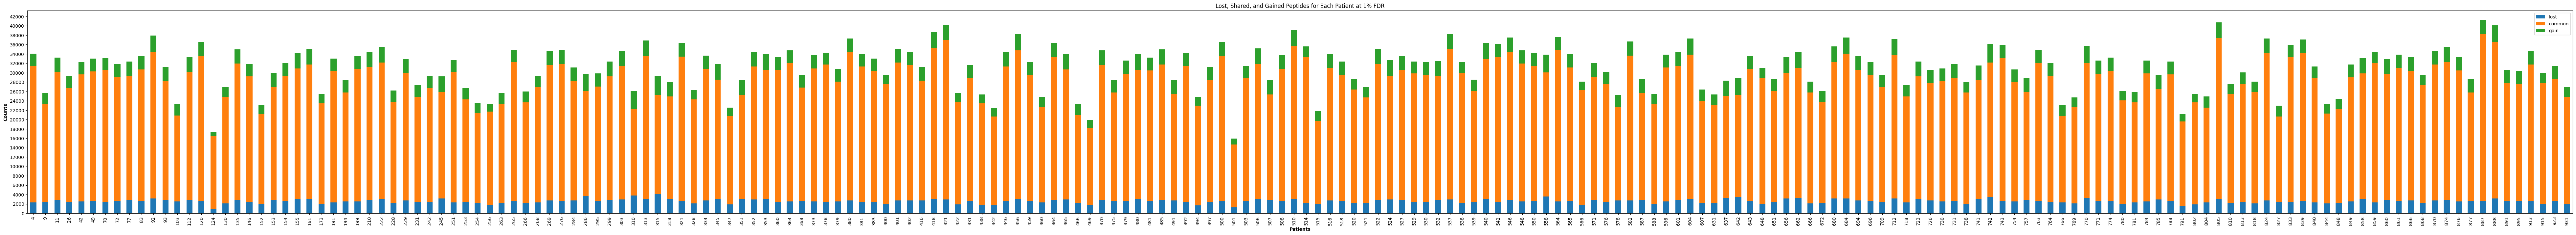

In [83]:
plt.figure(figsize= (100,8))

bar_set.plot(kind= "bar", figsize= (100,8),stacked= True)

plt.xlabel('Patients', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')

plt.yticks(range(0, max(bar_set.sum(axis=1)) + 2000, 2000))

plt.title("Lost, Shared, and Gained Peptides for Each Patient at 1% FDR")

now compare with the cleaned one

In [84]:
# Function to clean peptide column
def clean_peptides(df):
    df['modi_peptide'] = df['peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
    df['modi_peptide'] = df['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex=True)
    df['pep_length'] = df['modi_peptide'].str.len()
    return df

In [95]:
fcounting= []

# Iterate over each patient
for patient_number in patient_numbers:
    # Construct file paths for the current patient
    original_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'original.percolator.psms.txt')
    rescore_file_path = os.path.join(main_directory, str(patient_number), 'oktoberfest_output', 'results', 'percolator', 'rescore.percolator.psms.txt')
    
    # Load data files for the current patient
    percolator_output_andro = pd.read_csv(original_file_path, sep='\t', index_col= 0)
    percolator_output_prosit = pd.read_csv(rescore_file_path, sep='\t', index_col= 0)
    
    #display(percolator_output_andro.head())
    #display(percolator_output_prosit.head())

    # Clean peptide columns
    filt_andro = clean_peptides(percolator_output_andro)
    filt_prosit = clean_peptides(percolator_output_prosit)
    
    # Filter to 1% FDR
    filt_andro = filt_andro[filt_andro['q-value'] <= 0.01]
    filt_prosit = filt_prosit[filt_prosit['q-value'] <= 0.01]

    #display(filt_andro.head())
    #display(filt_prosit.head())

    filta_indx= set(filt_andro.index)
    filtp_indx= set(filt_prosit.index)
    
    fcommon= filta_indx.intersection(filtp_indx)
    fgain= filtp_indx.union(filta_indx)-filta_indx
    flost= filtp_indx.union(filta_indx)-filtp_indx
    

    fcounting.append({
        "patients_number" : patient_number,
        "lost" : len(flost),
        "common": len(fcommon),
        "gain": len(fgain),
    })

    #break

fset_df= pd.DataFrame(fcounting)
display(fset_df.head())
print(fset_df.shape)

patients_number  lost  common  gain
0                4   232   10123  6478
1                9    36    2174  2369
2               11   196    8920  6151
3               26   213    8595  1879
4               42   202    8513  5366

(212, 4)


Text(0.5, 1.0, 'Cleaned: Lost, Shared, and Gained Peptides for Each Patient at 1% FDR')

<Figure size 10000x800 with 0 Axes>

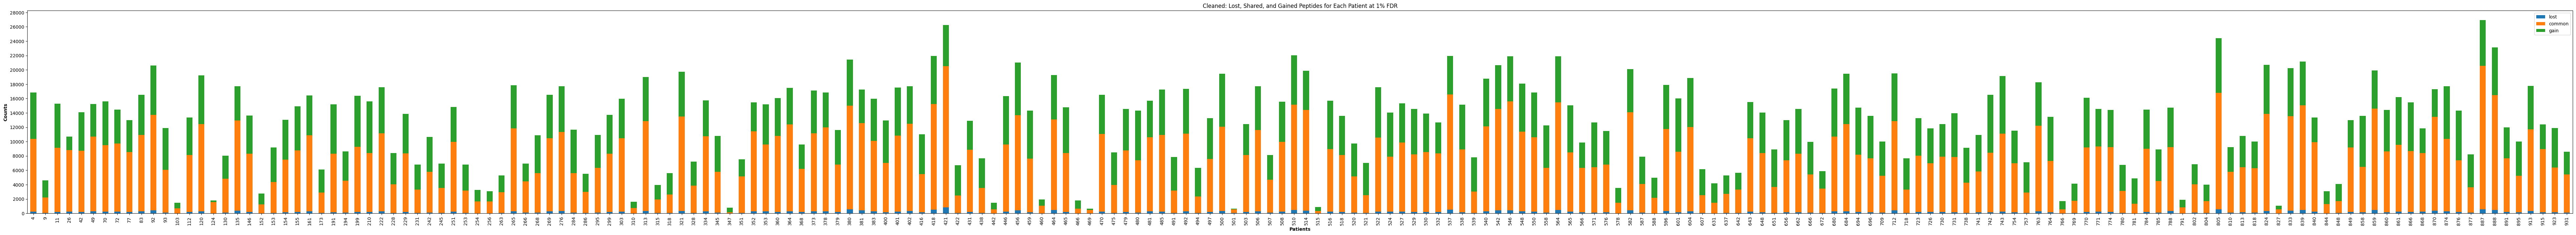

In [96]:
plt.figure(figsize= (100,8))

fset_index.plot(kind= "bar", figsize= (100,8),stacked= True)

plt.xlabel('Patients', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')

plt.yticks(range(0, max(fset_index.sum(axis=1)) + 2000, 2000))

plt.title("Cleaned: Lost, Shared, and Gained Peptides for Each Patient at 1% FDR")

In [92]:
fset_index= fset_df.set_index("patients_number")
display(fset_index.head(20))

lost  common  gain
patients_number                    
4                 232   10123  6478
9                  36    2174  2369
11                196    8920  6151
26                213    8595  1879
42                202    8513  5366
49                282   10410  4557
70                232    9292  6063
72                256    9463  4747
77                197    8362  4424
83                277   10664  5562
92                432   13297  6891
93                 90    5958  5843
103                25     683   773
112               167    7949  5238
120               279   12166  6806
124                20    1547   220
130                75    4730  3242
135               394   12534  4775
146               189    8132  5308
152                22    1236  1488

In [93]:
bar_set= set_df.set_index("patients_number")
display(bar_set.head(20))

lost  common  gain
patients_number                    
4                2339   29138  2617
9                2390   20957  2308
11               2820   27289  3121
26               2499   24241  2574
42               2548   27070  2665
49               2672   27573  2782
70               2391   28169  2556
72               2590   26517  2787
77               2881   26506  3019
83               2654   28058  2858
92               3173   31167  3596
93               2782   25417  3009
103              2515   18338  2437
112              2889   27325  3110
120              2622   30986  2902
124               982   15425   954
130              2147   22652  2183
135              2864   29123  3013
146              2426   26798  2567
152              1959   19155  1915